<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 100px">


<img src="http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/logo/hcg-logo.png?h=71&la=en&w=121" style="float: left; margin: 20px; height: 80px" alt="Home Credit Group">

# Isaac's GA Capstone Project 

### Home Credit - Default Risk

---
Home Credit B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic and headquartered in Netherlands. The company operates in 11 countries (Czech Republic, Slovakia, Russia, Kazakhstan, Ukraine, Belarus, China, India, Indonesia, Philippines and Vietnam) and focuses on lending primarily to people with little or no credit history. As of 2016 the company has served over 111 million active customers. The group offers loans in digital space and 434,232 retail stores.


**Project**:

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit Group strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

## Project Presentation Slides:
https://docs.google.com/presentation/d/1Yzp2Uu7tw_H_cQ2B1pfsnZQUn9dcxhsFSch4XaEqUHY/edit?usp=sharing

**Additional Research**:

A credit bureau Score is a number used by lenders as an indicator of how likely an individual is to repay his debts and the probability of going into default. It is an independent assessment of the individual's risk as a credit applicant.

Your credit score is just one factor used in the application process. Other factors apart from your credit report, such as your annual salary, length of employment, bankruptcy/litigation information, number of credit facilities may also be taken into consideration by lenders during a loan application.

Factors that Affect Your Credit Score?
1. Utilization Pattern

This refers to the amount of credit amount owed/used on accounts by individuals.
2. Recent Credit

Lenders may perceive that you are over-extending yourself if you have newly booked credit facilities within a short period of time.
Consumers are advised to apply for new credit in moderation.
3. Account Delinquency Data

Presence of delinquency (late payment) on your loan accounts will reduce your credit score.
4. Credit Account History

A consumer with long established credit history is deemed to be more favorable or a reliable borrower when compared to one who has limited or no credit history.
Accounts with history of prompt payments will help to boost your credit rating.
12 months of account repayment conduct (closed and defaulted accounts are also included) as displayed under the Account Status History in your credit report is used for score calculation.
5. Available Credit

This refers to the number of accounts available (open or active) for credit.
6. Enquiry Activity

This refers to the number of new application enquiries found in your credit
Each time a potential bank/financial institution pulls your credit report in response to a new loan application, an enquiry is placed on your file. Having too many enquiries in your credit report indicate to lenders that you are trying to take on more debt, therefore increasing your credit exposure.
To keep your enquiries to a minimum, try to limit the number of loan facilities and credit cards which you apply for.
Review enquiries on existing loan facilities do not affect your score.

## Datasets Description

**application_{train|test}.csv**

- The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. 
- The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

**bureau.csv**

- Data concerning client's previous credits from other financial institutions that were reported to Credit Bureau.
- Each previous credit has its own row in bureau, but one loan in the application data can have **multiple previous credits**.

**bureau_balance.csv**

- Monthly data about the previous credits in bureau. 
- Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

**previous_application.csv**

- Previous applications for loans at Home Credit of clients who have loans in the application data. 
- Each current loan in the application data can have multiple previous loans. 
- Each previous application has one row and is identified by the feature SK_ID_PREV.

**POS_CASH_balance.csv**

- Monthly data about previous point of sale or cash loans clients have had with Home Credit. 
- Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

**credit_card_balance.csv**

- Monthly data about previous credit cards clients have had with Home Credit. 
- Each row is one month of a credit card balance, and a single credit card can have many rows.

**installments_payments.csv**

- Payment history for previous loans at Home Credit. 
- There is **one row for every made payment and one row for every missed payment**.

**HomeCredit_columns_description.csv**

- This file contains descriptions for the columns in the various data files.

In [2]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

In [24]:
app_train = pd.read_csv('./application_train.csv')
app_test = pd.read_csv('./application_test.csv')
bureau = pd.read_csv('./bureau.csv')
bureau_bal = pd.read_csv('./bureau_balance.csv')
pos = pd.read_csv('./POS_CASH_balance.csv')
credit_card = pd.read_csv('./credit_card_balance.csv')
previous_app = pd.read_csv('./previous_application.csv')
installment = pd.read_csv('./installments_payments.csv')
description = pd.read_csv('./HomeCredit_columns_description.csv')

In [25]:
print('Application_train data Size:', app_train.shape)
print('Unique current ID of application_train data:', app_train['SK_ID_CURR'].nunique())
print('-'*60)
print('Application_test data Size:', app_test.shape)
print('Unique current ID of application_test data:', app_test['SK_ID_CURR'].nunique())
print('-'*60)
print('Bureau data Size:', bureau.shape)
print('Unique current ID of bureau data:', bureau['SK_ID_CURR'].nunique())
print('Unique bureau ID of bureau data:', bureau['SK_ID_BUREAU'].nunique())
print('-'*60)
print('Bureau_balance data Size:', bureau_bal.shape)
print('Unique bureau ID of bureau_balance data:', bureau_bal['SK_ID_BUREAU'].nunique())
print('-'*60)
print('Previous_application data Size:', previous_app.shape)
print('Unique current ID of previous_application data:', previous_app['SK_ID_CURR'].nunique())
print('Unique previous ID of previous_application data:', previous_app['SK_ID_PREV'].nunique())
print('-'*60)
print('POS_CASH_balance data Size:', pos.shape)
print('Unique current ID of POS_CASH_balance data:', pos['SK_ID_CURR'].nunique())
print('Unique previous ID of POS_CASH_balance data:', pos['SK_ID_PREV'].nunique())
print('-'*60)
print('Credit_card_balance data Size:', credit_card.shape)
print('Unique current ID of credit_card_balance data:', credit_card['SK_ID_CURR'].nunique())
print('Unique previous ID of credit_card_balance data:', credit_card['SK_ID_PREV'].nunique())
print('-'*60)
print('Installments_payments data Size:', installment.shape)
print('Unique current ID of installments_payments data:', installment['SK_ID_CURR'].nunique())
print('Unique previous ID of installments_payments data:', installment['SK_ID_PREV'].nunique())

Application_train data Size: (307511, 122)
Unique current ID of application_train data: 307511
------------------------------------------------------------
Application_test data Size: (48744, 121)
Unique current ID of application_test data: 48744
------------------------------------------------------------
Bureau data Size: (1716428, 17)
Unique current ID of bureau data: 305811
Unique bureau ID of bureau data: 1716428
------------------------------------------------------------
Bureau_balance data Size: (27299925, 3)
Unique bureau ID of bureau_balance data: 817395
------------------------------------------------------------
Previous_application data Size: (1670214, 37)
Unique current ID of previous_application data: 338857
Unique previous ID of previous_application data: 1670214
------------------------------------------------------------
POS_CASH_balance data Size: (10001358, 8)
Unique current ID of POS_CASH_balance data: 337252
Unique previous ID of POS_CASH_balance data: 936325
----

In [17]:
# display full non-truncated dataframe for description column below to understand our dataset
pd.set_option('display.max_colwidth', -1)

description=description[['Table','Row','Description','Special']]
description

Table                         Row  \
0    application.csv            SK_ID_CURR                   
1    application.csv            TARGET                       
2    application.csv            NAME_CONTRACT_TYPE           
3    application.csv            CODE_GENDER                  
4    application.csv            FLAG_OWN_CAR                 
5    application.csv            FLAG_OWN_REALTY              
6    application.csv            CNT_CHILDREN                 
7    application.csv            AMT_INCOME_TOTAL             
8    application.csv            AMT_CREDIT                   
9    application.csv            AMT_ANNUITY                  
10   application.csv            AMT_GOODS_PRICE              
11   application.csv            NAME_TYPE_SUITE              
12   application.csv            NAME_INCOME_TYPE             
13   application.csv            NAME_EDUCATION_TYPE          
14   application.csv            NAME_FAMILY_STATUS           
15   application.csv            NAME_HOUSING_TYPE            
16   application.csv            REGION_POPULATION_RELATIVE   
17   application.csv            DAYS_BIRTH                   
18   application.csv            DAYS_EMPLOYED                
19   application.csv            DAYS_REGISTRATION            
20   application.csv            DAYS_ID_PUBLISH              
21   application.csv            OWN_CAR_AGE                  
22   application.csv            FLAG_MOBIL                   
23   application.csv            FLAG_EMP_PHONE               
24   application.csv            FLAG_WORK_PHONE              
25   application.csv            FLAG_CONT_MOBILE             
26   application.csv            FLAG_PHONE                   
27   application.csv            FLAG_EMAIL                   
28   application.csv            OCCUPATION_TYPE              
29   application.csv            CNT_FAM_MEMBERS              
..               ...                        ...              
189  previous_application.csv   NAME_CASH_LOAN_PURPOSE       
190  previous_application.csv   NAME_CONTRACT_STATUS         
191  previous_application.csv   DAYS_DECISION                
192  previous_application.csv   NAME_PAYMENT_TYPE            
193  previous_application.csv   CODE_REJECT_REASON           
194  previous_application.csv   NAME_TYPE_SUITE              
195  previous_application.csv   NAME_CLIENT_TYPE             
196  previous_application.csv   NAME_GOODS_CATEGORY          
197  previous_application.csv   NAME_PORTFOLIO               
198  previous_application.csv   NAME_PRODUCT_TYPE            
199  previous_application.csv   CHANNEL_TYPE                 
200  previous_application.csv   SELLERPLACE_AREA             
201  previous_application.csv   NAME_SELLER_INDUSTRY         
202  previous_application.csv   CNT_PAYMENT                  
203  previous_application.csv   NAME_YIELD_GROUP             
204  previous_application.csv   PRODUCT_COMBINATION          
205  previous_application.csv   DAYS_FIRST_DRAWING           
206  previous_application.csv   DAYS_FIRST_DUE               
207  previous_application.csv   DAYS_LAST_DUE_1ST_VERSION    
208  previous_application.csv   DAYS_LAST_DUE                
209  previous_application.csv   DAYS_TERMINATION             
210  previous_application.csv   NFLAG_INSURED_ON_APPROVAL    
211  installments_payments.csv  SK_ID_PREV                   
212  installments_payments.csv  SK_ID_CURR                   
213  installments_payments.csv  NUM_INSTALMENT_VERSION       
214  installments_payments.csv  NUM_INSTALMENT_NUMBER        
215  installments_payments.csv  DAYS_INSTALMENT              
216  installments_payments.csv  DAYS_ENTRY_PAYMENT           
217  installments_payments.csv  AMT_INSTALMENT               
218  installments_payments.csv  AMT_PAYMENT                  

                                                                                                                                                                                    

In [26]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0  215354      5714462       Closed        currency 1     -497           
1  215354      5714463       Active        currency 1     -208           
2  215354      5714464       Active        currency 1     -203           
3  215354      5714465       Active        currency 1     -203           
4  215354      5714466       Active        currency 1     -629           

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0  0                  -153.0               -153.0               
1  0                   1075.0              NaN                  
2  0                   528.0               NaN                  
3  0                  NaN                  NaN                  
4  0                   1197.0              NaN                  

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0 NaN                      0                   91323.0          
1 NaN                      0                   225000.0         
2 NaN                      0                   464323.5         
3 NaN                      0                   90000.0          
4  77674.5                 0                   2700000.0        

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0  0.0                 NaN                    0.0                      
1  171342.0            NaN                    0.0                      
2 NaN                  NaN                    0.0                      
3 NaN                  NaN                    0.0                      
4 NaN                  NaN                    0.0                      

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit -131                NaN           
1  Credit card     -20                 NaN           
2  Consumer credit -16                 NaN           
3  Credit card     -16                 NaN           
4  Consumer credit -21                 NaN

In [27]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
bureau_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'credit_bureau_loan_counts'})
bureau_loan_counts.head(3)

SK_ID_CURR  credit_bureau_loan_counts
0  100001      7                        
1  100002      8                        
2  100003      4

In [28]:
# Join counts to the training & test dataframe
app_train = app_train.merge(bureau_loan_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 as there are no previous loan records 
app_train['credit_bureau_loan_counts'] = app_train['credit_bureau_loan_counts'].fillna(0)
app_test['credit_bureau_loan_counts'] = app_test['credit_bureau_loan_counts'].fillna(0)
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

             ...              FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0            ...              0                 0                 
1            ...              0                 0                 
2            ...              0                 0                 
3            ...              0                 0                 
4            ...              0                 0                 

  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  0                0.0                        0.0                        
1  0                0.0                        0.0                        
2  0                0.0                        0.0                        
3  0               NaN                        NaN                         
4  0                0.0                        0.0                        

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0  0.0                        0.0                         
1  0.0                        0.0                         
2  0.0                        0.0                         
3 NaN                        NaN                          
4  0.0                        0.0                         

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0  0.0                        1.0                          
1  0.0                        0.0                          
2  0.0                        0.0                          
3 NaN                        NaN                           
4  0.0                        0.0                          

   credit_bureau_loan_counts  
0  8.0                        
1  4.0                        
2  2.0                        
3  0.0                        
4  1.0                        

[5 rows x 123 columns]

In [30]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

             ...              FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0            ...              0                 0                 
1            ...              0                 0                 
2            ...              0                 0                 
3            ...              0                 0                 
4            ...              0                 0                 

  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  0                0.0                        0.0                        
1  0                0.0                        0.0                        
2  0                0.0                        0.0                        
3  0               NaN                        NaN                         
4  0                0.0                        0.0                        

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0  0.0                        0.0                         
1  0.0                        0.0                         
2  0.0                        0.0                         
3 NaN                        NaN                          
4  0.0                        0.0                         

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0  0.0                        1.0                          
1  0.0                        0.0                          
2  0.0                        0.0                          
3 NaN                        NaN                           
4  0.0                        0.0                          

   credit_bureau_loan_counts  
0  8.0                        
1  4.0                        
2  2.0                        
3  0.0                        
4  1.0                        

[5 rows x 123 columns]

In [31]:
previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0  2030495     271877      Consumer loans     1730.430     17145.0           
1  2802425     108129      Cash loans         25188.615    607500.0          
2  2523466     122040      Cash loans         15060.735    112500.0          
3  2819243     176158      Cash loans         47041.335    450000.0          
4  1784265     202054      Cash loans         31924.395    337500.0          

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0     0.0               17145.0          SATURDAY                    
1  679671.0   NaN                607500.0         THURSDAY                    
2  136444.5   NaN                112500.0         TUESDAY                     
3  470790.0   NaN                450000.0         MONDAY                      
4  404055.0   NaN                337500.0         THURSDAY                    

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0  15                                 ...             Connectivity          
1  11                                 ...             XNA                   
2  11                                 ...             XNA                   
3  7                                  ...             XNA                   
4  9                                  ...             XNA                   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0  12.0         middle            POS mobile with interest   
1  36.0         low_action        Cash X-Sell: low           
2  12.0         high              Cash X-Sell: high          
3  12.0         middle            Cash X-Sell: middle        
4  24.0         high              Cash Street: high          

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0  365243.0           -42.0           300.0                    -42.0            
1  365243.0           -134.0          916.0                     365243.0        
2  365243.0           -271.0          59.0                      365243.0        
3  365243.0           -482.0         -152.0                    -182.0           
4 NaN                 NaN            NaN                       NaN              

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0 -37.0             0.0                       
1  365243.0         1.0                       
2  365243.0         1.0                       
3 -177.0            1.0                       
4 NaN              NaN                        

[5 rows x 37 columns]

In [11]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = previous_app.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'previous_loan_counts'})
previous_loan_counts.head(3)

SK_ID_CURR  previous_loan_counts
0  100001      1                   
1  100002      1                   
2  100003      3

In [298]:
# # Join counts to the training & test dataframe
# app_train = app_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
# app_test = app_test.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# # Fill the missing values with 0 as there are no previous loan records 
# app_train['previous_loan_counts'] = app_train['previous_loan_counts'].fillna(0)
# app_test['previous_loan_counts'] = app_test['previous_loan_counts'].fillna(0)
# app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

           ...           FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0          ...           0                 0                 
1          ...           0                 0                 
2          ...           0                 0                 
3          ...           0                 0                 
4          ...           0                 0                 

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  0.0                        0.0                        
1  0.0                        0.0                        
2  0.0                        0.0                        
3 NaN                        NaN                         
4  0.0                        0.0                        

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0  0.0                        0.0                        
1  0.0                        0.0                        
2  0.0                        0.0                        
3 NaN                        NaN                         
4  0.0                        0.0                        

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0  0.0                        1.0                          
1  0.0                        0.0                          
2  0.0                        0.0                          
3 NaN                        NaN                           
4  0.0                        0.0                          

   credit_bureau_loan_counts  previous_loan_counts  
0  8.0                        1.0                   
1  4.0                        3.0                   
2  2.0                        1.0                   
3  0.0                        9.0                   
4  1.0                        6.0                   

[5 rows x 124 columns]

In [32]:
bureau_active=bureau[bureau['CREDIT_ACTIVE']=='Active']

# How many days before current application did client apply for Credit Bureau credit
most_recent_credit_application = bureau_active.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT'].min().rename(columns = {'DAYS_CREDIT': 'bureau_DAYS_CREDIT_latest'})

# Average Number of days past due on Credit Bureau credit at the time of application for related loan in our sample
avg_days_overdue = bureau_active.groupby('SK_ID_CURR', as_index=False)['CREDIT_DAY_OVERDUE'].median().rename(columns = {'CREDIT_DAY_OVERDUE': 'bureau_CREDIT_DAY_OVERDUE_median'})

# Maximum amount overdue so far
max_amt_overdue = bureau_active.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_MAX_OVERDUE'].max().rename(columns = {'AMT_CREDIT_MAX_OVERDUE': 'bureau_AMT_CREDIT_MAX_OVERDUE_max'})

# How many times was the Credit Bureau credit prolonged
times_CB_prolonged = bureau_active.groupby('SK_ID_CURR', as_index=False)['CNT_CREDIT_PROLONG'].max().rename(columns = {'CNT_CREDIT_PROLONG': 'bureau_CNT_CREDIT_PROLONG_max'})

# Current credit amount for the Credit Bureau credit
current_credit_amt = bureau_active.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM'].sum().rename(columns = {'AMT_CREDIT_SUM': 'bureau_AMT_CREDIT_SUM_all'})

# Current amount overdue on Credit Bureau credit
current_amt_overdue = bureau_active.groupby('SK_ID_CURR', as_index=False)['AMT_CREDIT_SUM_OVERDUE'].sum().rename(columns = {'AMT_CREDIT_SUM_OVERDUE': 'bureau_AMT_CREDIT_SUM_OVERDUE_all'})

In [33]:
print(app_train.shape)
print(app_test.shape)

(307511, 123)
(48744, 122)


In [34]:
# Join counts to the training & test dataframe
app_train = app_train.merge(most_recent_credit_application, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(most_recent_credit_application, on = 'SK_ID_CURR', how = 'left')

app_train = app_train.merge(avg_days_overdue, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(avg_days_overdue, on = 'SK_ID_CURR', how = 'left')

app_train = app_train.merge(max_amt_overdue, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(max_amt_overdue, on = 'SK_ID_CURR', how = 'left')

app_train = app_train.merge(times_CB_prolonged, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(times_CB_prolonged, on = 'SK_ID_CURR', how = 'left')

app_train = app_train.merge(current_credit_amt, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(current_credit_amt, on = 'SK_ID_CURR', how = 'left')

app_train = app_train.merge(current_amt_overdue, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(current_amt_overdue, on = 'SK_ID_CURR', how = 'left')

print(app_train.shape)
print(app_test.shape)

(307511, 129)
(48744, 128)


In [35]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

                 ...                  AMT_REQ_CREDIT_BUREAU_MON  \
0                ...                  0.0                         
1                ...                  0.0                         
2                ...                  0.0                         
3                ...                 NaN                          
4                ...                  0.0                         

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  \
0  0.0                       1.0                         
1  0.0                       0.0                         
2  0.0                       0.0                         
3 NaN                       NaN                          
4  0.0                       0.0                         

  credit_bureau_loan_counts bureau_DAYS_CREDIT_latest  \
0  8.0                      -1042.0                     
1  4.0                      -606.0                      
2  2.0                      NaN                         
3  0.0                      NaN                         
4  1.0                      NaN                         

  bureau_CREDIT_DAY_OVERDUE_median  bureau_AMT_CREDIT_MAX_OVERDUE_max  \
0  0.0                              40.5                                
1  0.0                              0.0                                 
2 NaN                              NaN                                  
3 NaN                              NaN                                  
4 NaN                              NaN                                  

   bureau_CNT_CREDIT_PROLONG_max  bureau_AMT_CREDIT_SUM_all  \
0  0.0                            481988.565                  
1  0.0                            810000.000                  
2 NaN                            NaN                          
3 NaN                            NaN                          
4 NaN                            NaN                          

   bureau_AMT_CREDIT_SUM_OVERDUE_all  
0  0.0                                
1  0.0                                
2 NaN                                 
3 NaN                                 
4 NaN                                 

[5 rows x 129 columns]

0    282686
1    24825 
Name: TARGET, dtype: int64



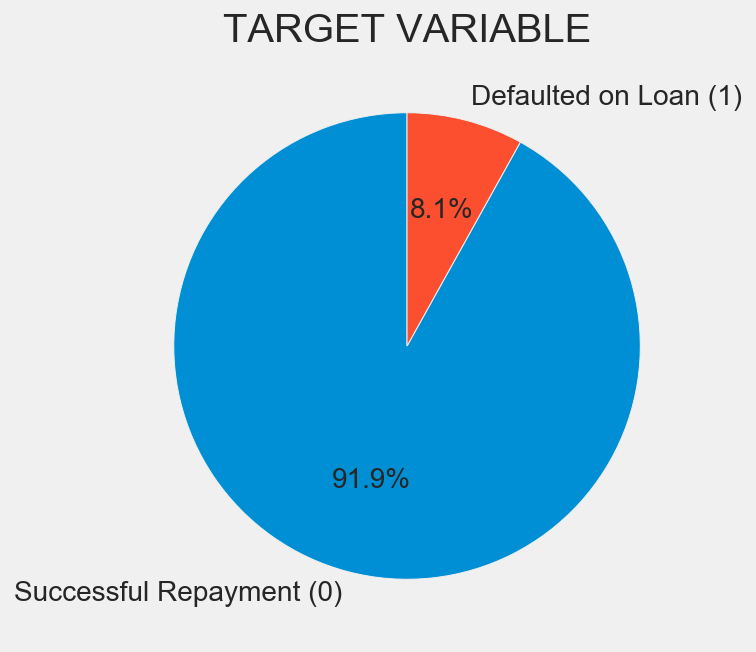

In [307]:
# Check if data is balanced or imbalanced.
print(app_train['TARGET'].value_counts())
print()
plt.figure(figsize=(5,5))
plt.title('TARGET VARIABLE',fontsize = '20')
plt.pie(app_train['TARGET'].value_counts(), labels=['Successful Repayment (0)','Defaulted on Loan (1)'], startangle=90, autopct='%.1f%%')
plt.show()

# plt.figure(figsize=(5,5))
# plt.title('TYPES OF LOAN UNDERTAKEN',fontsize = '15')
# plt.pie(app_train['NAME_CONTRACT_TYPE'].value_counts(), labels=['Cash Loan', 'Revolving Loan'], startangle=90, autopct='%.1f%%')
# plt.show()

Text(0.5, 1.0, 'Distribution for Credit Amount of Loans')

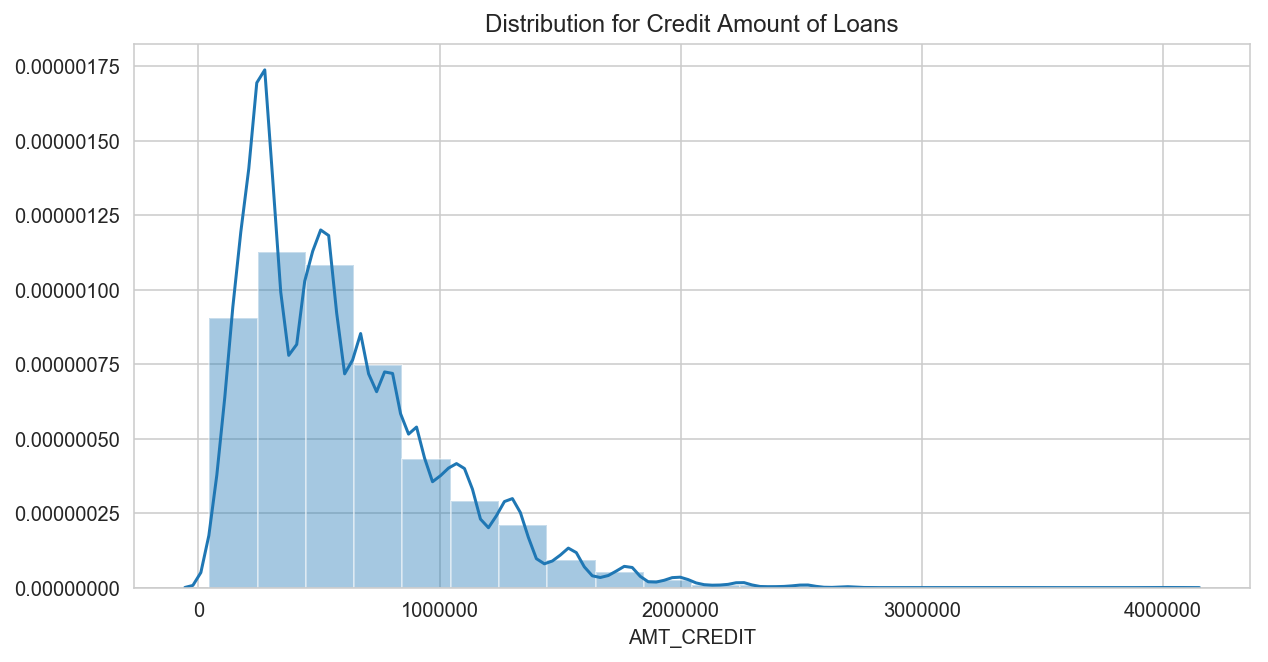

In [17]:
plt.subplots(figsize=(10,5))
sns.distplot(app_train['AMT_CREDIT'],bins=20).set_title('Distribution for Credit Amount of Loans')

In [36]:
app_train.shape

(307511, 129)

In [107]:
app_train[app_train['AMT_INCOME_TOTAL']>2000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
10222   111903      0       Revolving loans    M           N             
12840   114967      1       Cash loans         F           N             
20216   123587      0       Cash loans         M           Y             
29737   134526      0       Revolving loans    M           N             
35572   141198      0       Cash loans         F           Y             
39611   145858      0       Cash loans         F           N             
49645   157471      0       Cash loans         F           Y             
55329   164105      0       Revolving loans    M           Y             
62478   172449      0       Cash loans         M           Y             
71637   183074      0       Revolving loans    F           N             
74781   186724      0       Revolving loans    F           Y             
77768   190160      0       Cash loans         F           Y             
81185   194130      0       Revolving loans    F           Y             
82846   196091      0       Cash loans         F           N             
86026   199821      0       Cash loans         M           Y             
91571   206341      0       Cash loans         M           Y             
98243   214063      0       Cash loans         F           Y             
101007  217276      0       Revolving loans    M           Y             
103006  219563      0       Revolving loans    M           Y             
107926  225210      0       Cash loans         M           Y             
115016  233366      0       Cash loans         F           N             
131127  252084      0       Cash loans         M           Y             
143936  266899      0       Cash loans         M           Y             
145673  268905      0       Revolving loans    M           Y             
158338  283559      0       Revolving loans    M           Y             
176312  304300      0       Cash loans         F           Y             
181698  310601      0       Cash loans         M           Y             
187833  317748      0       Cash loans         M           N             
195807  327048      0       Revolving loans    M           Y             
201855  333985      0       Cash loans         F           Y             
203693  336147      0       Cash loans         M           Y             
204564  337151      0       Cash loans         M           N             
206814  339713      0       Cash loans         F           N             
246858  385674      0       Cash loans         M           Y             
248058  387025      0       Cash loans         F           Y             
248159  387126      1       Cash loans         F           Y             
258773  399467      0       Revolving loans    M           Y             
278212  422344      0       Cash loans         M           Y             
284311  429258      0       Cash loans         M           Y             
287463  432980      0       Cash loans         M           Y             
294076  440695      0       Cash loans         M           Y             
294892  441639      0       Revolving loans    F           N             
298082  445335      0       Cash loans         M           Y             
304477  452764      0       Cash loans         F           Y             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
10222   Y               3             2250000.0         900000.0     
12840   Y               1             117000000.0       562491.0     
20216   N               0             3825000.0         1241023.5    
29737   N               0             2250000.0         1350000.0    
35572   Y               1             2025000.0         733315.5     
39611   N               0             2025000.0         1190340.0    
49645   N               0             3600000.0         953460.0     
55329   Y               0             2250000.0         1350000.0    
62478   Y               0             2070000.0

In [201]:
# since our main customers are unbanked customers, i will be making an assumption that they income falls in the lower range,
# we will drop these high income outliers.
#app_train = app_train[app_train['AMT_INCOME_TOTAL']<2000000]
#app_train.shape

(307467, 130)

Text(0.5, 1.0, 'Distribution for Income of Clients')

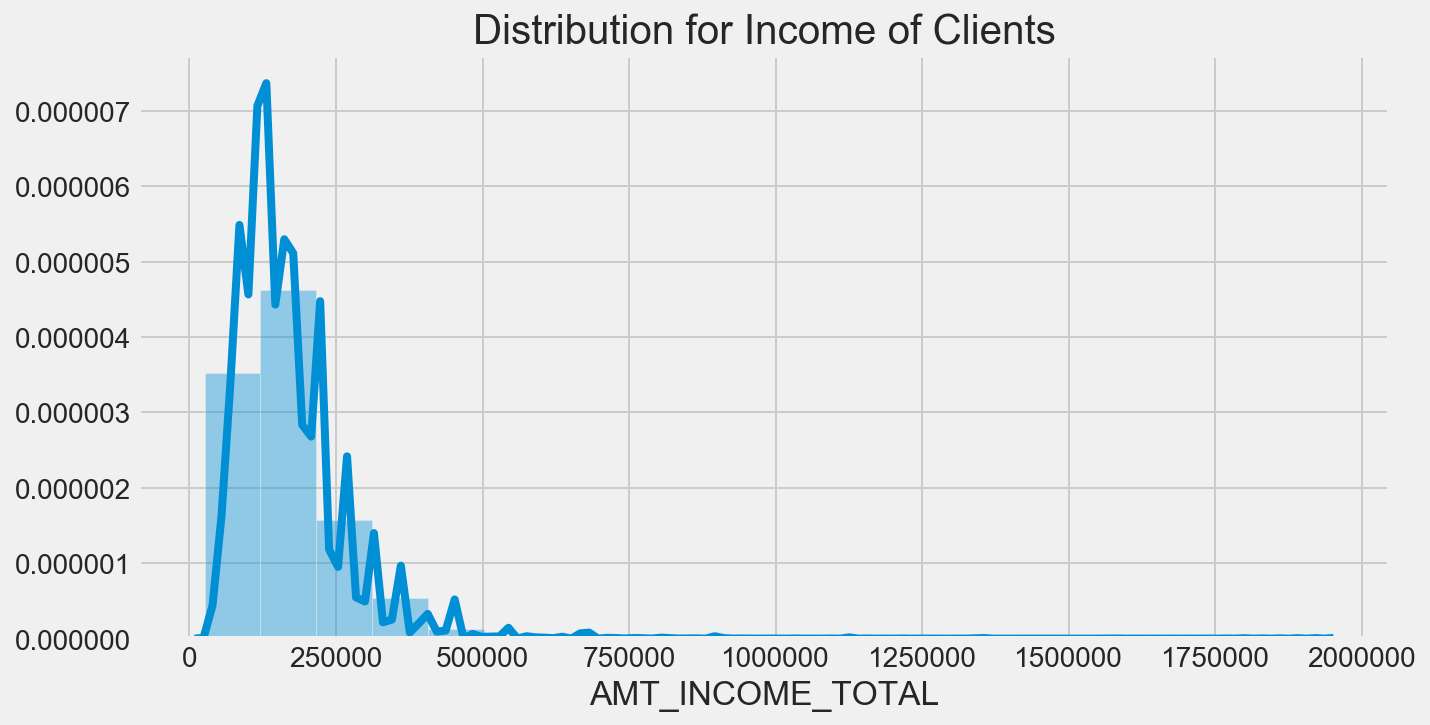

In [202]:
plt.subplots(figsize=(10,5))
sns.distplot(app_train['AMT_INCOME_TOTAL'],bins=20).set_title('Distribution for Income of Clients')

In [ ]:
# Remove extreme income outliers to see distribution plot
default_train = app_train[app_train['AMT_INCOME_TOTAL']<1000000][app_train['TARGET']==1]
normal_train = app_train[app_train['AMT_INCOME_TOTAL']<1000000][app_train['TARGET']==0]

plt.subplots(figsize=(10,5))
sns.distplot(default_train['AMT_INCOME_TOTAL'],bins=20).set_title('Distribution for Income of Clients')
sns.distplot(normal_train['AMT_INCOME_TOTAL'],bins=20).set_title('Distribution for Income of Clients')
plt.legend(labels=['DEFAULT','DID NOT DEFAULT'], loc = 'best')
plt.show()

Text(0.5, 1.0, 'Distribution for Price of goods for which loan is given')

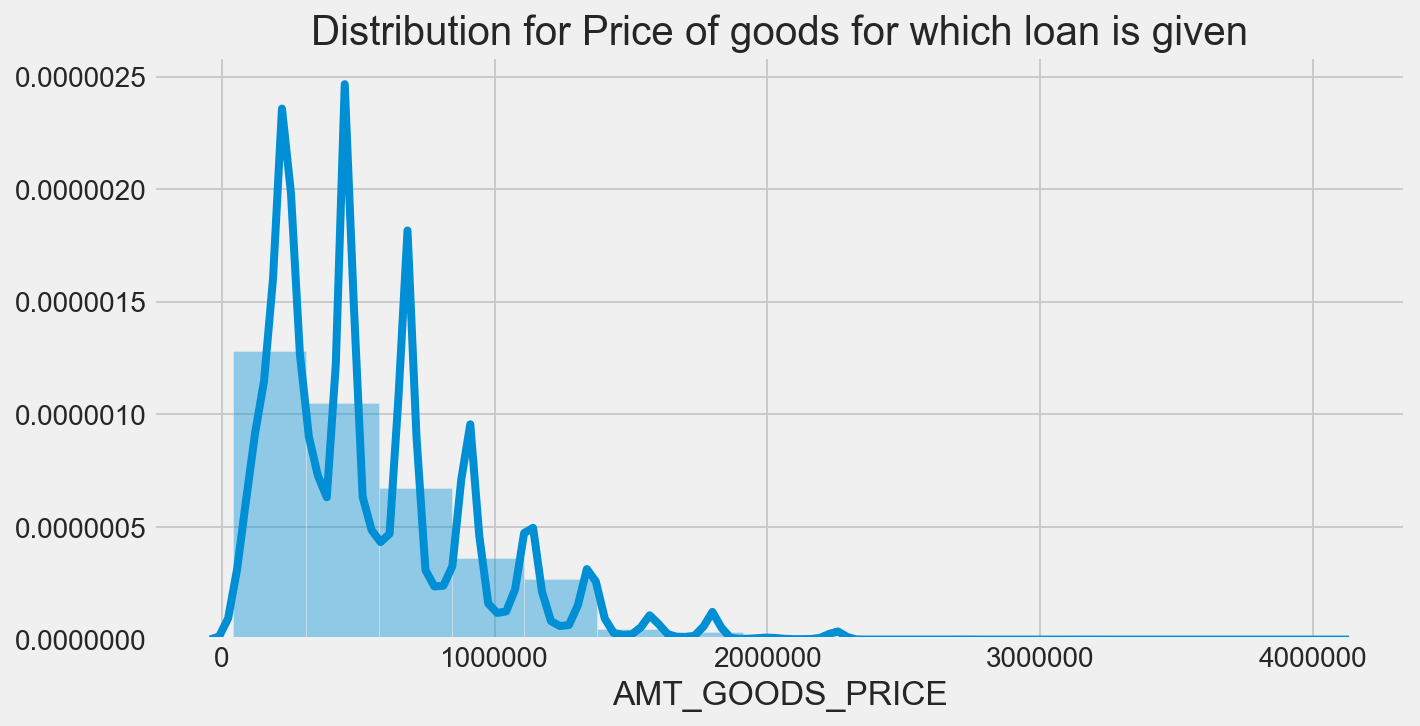

In [181]:
plt.subplots(figsize=(10,5))
sns.distplot(app_train['AMT_GOODS_PRICE'],bins=15).set_title('Distribution for Price of goods for which loan is given')

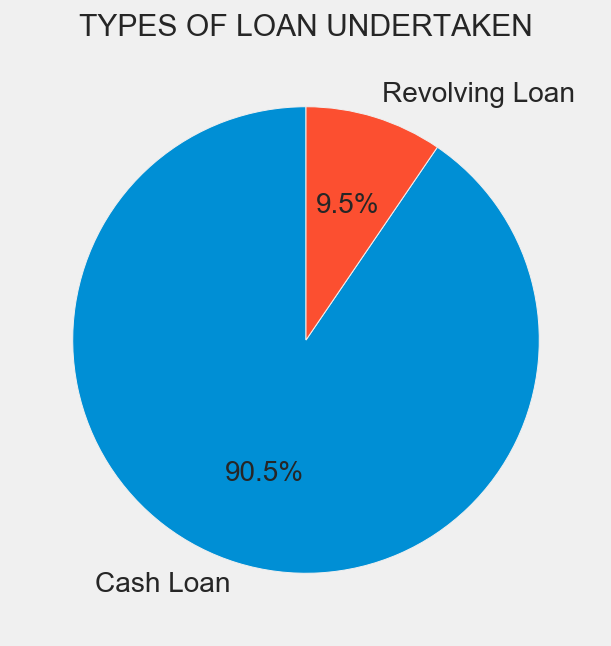

In [182]:
# Check type of loans
plt.figure(figsize=(5,5))
plt.title('TYPES OF LOAN UNDERTAKEN',fontsize = '15')
plt.pie(app_train['NAME_CONTRACT_TYPE'].value_counts(), labels=['Cash Loan', 'Revolving Loan'], startangle=90, autopct='%.1f%%')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

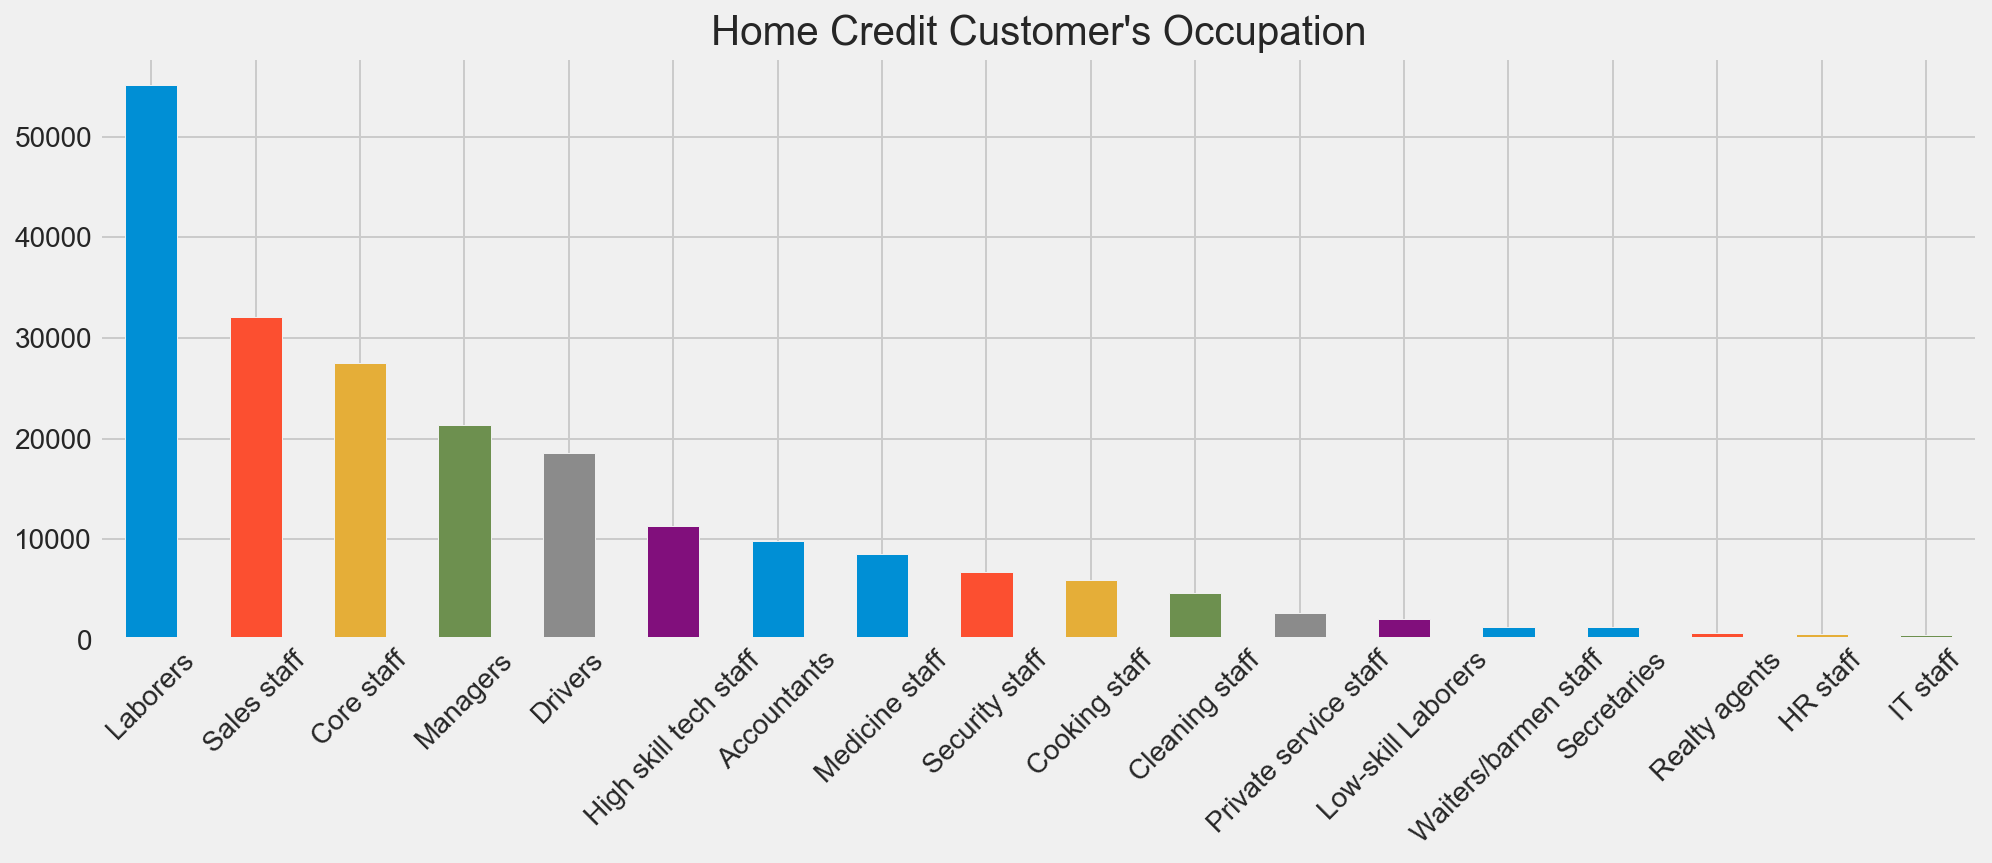

In [203]:
app_train['OCCUPATION_TYPE'].value_counts().plot(kind="bar", figsize = (15,5),title = "Home Credit Customer's Occupation")
plt.xticks(rotation=45)

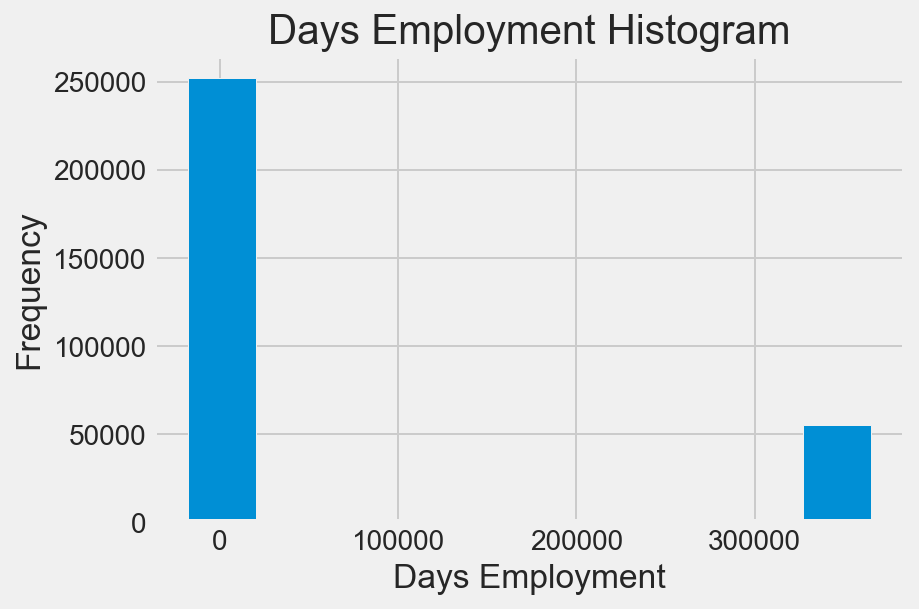

In [204]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [308]:
app_train['DAYS_EMPLOYED'].value_counts().head()

 365243    55374
-200       156  
-224       152  
-199       151  
-230       151  
Name: DAYS_EMPLOYED, dtype: int64

That doesn't look right, The maximum value (besides being positive) is about 1000 years.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [37]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [38]:
days_employed = app_train['DAYS_EMPLOYED']/-1

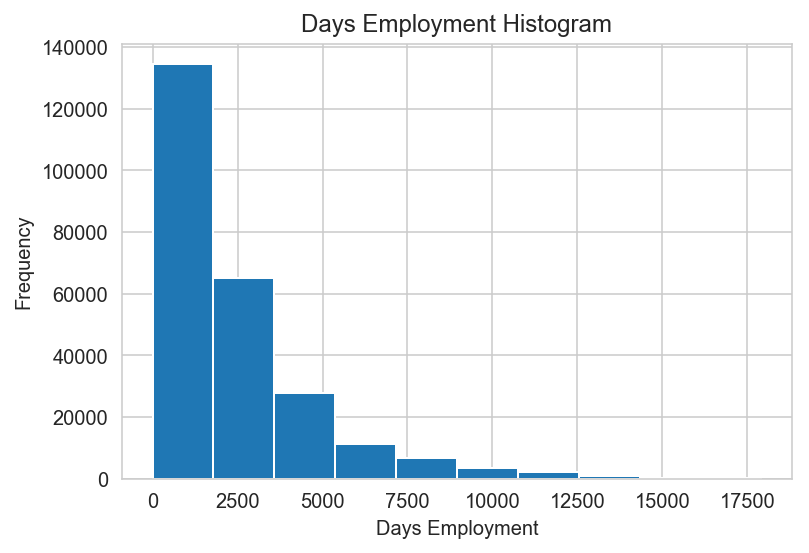

In [39]:
days_employed.plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [40]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [41]:
missing_values_table(app_train).head(20)

Your selected dataframe has 130 columns.
There are 74 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                    214865          69.9             
COMMONAREA_MODE                    214865          69.9             
COMMONAREA_AVG                     214865          69.9             
NONLIVINGAPARTMENTS_AVG            213514          69.4             
NONLIVINGAPARTMENTS_MEDI           213514          69.4             
NONLIVINGAPARTMENTS_MODE           213514          69.4             
FONDKAPREMONT_MODE                 210295          68.4             
LIVINGAPARTMENTS_MODE              210199          68.4             
LIVINGAPARTMENTS_AVG               210199          68.4             
LIVINGAPARTMENTS_MEDI              210199          68.4             
FLOORSMIN_MODE                     208642          67.8             
FLOORSMIN_AVG                      208642          67.8             
FLOORSMIN_MEDI                     208642          67.8             
YEARS_BUILD_MODE                   204488          66.5             
YEARS_BUILD_MEDI                   204488          66.5             
YEARS_BUILD_AVG                    204488          66.5             
OWN_CAR_AGE                        202929          66.0             
bureau_AMT_CREDIT_MAX_OVERDUE_max  191471          62.3             
LANDAREA_MEDI                      182590          59.4             
LANDAREA_AVG                       182590          59.4

Majority of housing features are missing. We will drop them at a later stage

In [42]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [43]:
app_train.shape

(307511, 130)

In [44]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 251)
Testing Features shape:  (48744, 247)


In [45]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 248)
Testing Features shape:  (48744, 247)


In [46]:
corrs = app_train.corr().sort_values('TARGET', ascending = False)
corrs['TARGET'].head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_INCOME_TYPE_Working       0.057481
DAYS_LAST_PHONE_CHANGE         0.055218
CODE_GENDER_M                  0.054713
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

In [47]:
corrs['TARGET'].dropna().tail(10)

FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
NAME_INCOME_TYPE_Pensioner             -0.046209
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, dtype: float64

In [137]:
corrs.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
TARGET                      -0.002108   -0.030896           -0.021851       
DAYS_BIRTH                  -0.001500    0.086364            0.129879       
DAYS_EMPLOYED               -0.000084    0.036388            0.023096       
REGION_RATING_CLIENT_W_CITY -0.001138   -0.023116           -0.021405       
REGION_RATING_CLIENT        -0.001075   -0.021593           -0.022668       

                             FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                      -0.006148         0.019187     -0.003982           
DAYS_BIRTH                  -0.119146         0.330938      0.027261           
DAYS_EMPLOYED               -0.030665         0.061145     -0.013005           
REGION_RATING_CLIENT_W_CITY  0.001884         0.024781     -0.091735           
REGION_RATING_CLIENT         0.001289         0.025423     -0.085465           

                             AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                      -0.030369   -0.012817    -0.039645          
DAYS_BIRTH                  -0.055436    0.009445    -0.053442          
DAYS_EMPLOYED               -0.091295   -0.053604    -0.093374          
REGION_RATING_CLIENT_W_CITY -0.110915   -0.141682    -0.112208          
REGION_RATING_CLIENT        -0.101776   -0.128525    -0.103786          

                             REGION_POPULATION_RELATIVE    ...     \
TARGET                      -0.037227                      ...      
DAYS_BIRTH                  -0.029582                      ...      
DAYS_EMPLOYED                0.004155                      ...      
REGION_RATING_CLIENT_W_CITY -0.531535                      ...      
REGION_RATING_CLIENT        -0.532877                      ...      

                             WALLSMATERIAL_MODE_Block  \
TARGET                      -0.006777                   
DAYS_BIRTH                  -0.006749                   
DAYS_EMPLOYED               -0.004689                   
REGION_RATING_CLIENT_W_CITY -0.049740                   
REGION_RATING_CLIENT        -0.054240                   

                             WALLSMATERIAL_MODE_Mixed  \
TARGET                      -0.001713                   
DAYS_BIRTH                  -0.000262                   
DAYS_EMPLOYED               -0.000801                   
REGION_RATING_CLIENT_W_CITY -0.015432                   
REGION_RATING_CLIENT        -0.012279                   

                             WALLSMATERIAL_MODE_Monolithic  \
TARGET                      -0.009384                        
DAYS_BIRTH                   0.004421                        
DAYS_EMPLOYED                0.004675                        
REGION_RATING_CLIENT_W_CITY -0.055445                        
REGION_RATING_CLIENT        -0.053854                        

                             WALLSMATERIAL_MODE_Others  \
TARGET                       0.000628                    
DAYS_BIRTH                  -0.000690                    
DAYS_EMPLOYED               -0.000974                    
REGION_RATING_CLIENT_W_CITY -0.018756                    
REGION_RATING_CLIENT        -0.020729                    

                             WALLSMATERIAL_MODE_Panel  \
TARGET                      -0.033119                   
DAYS_BIRTH                  -0.013597                   
DAYS_EMPLOYED               -0.019051                   
REGION_RATING_CLIENT_W_CITY -0.110948                   
REGION_RATING_CLIENT        -0.073936                   

                             WALLSMATERIAL_MODE_Stone, brick  \
TARGET                      -0.012657                          
DAYS_BIRTH                  -0.010964                          
DAYS_EMPLOYED               -0.016164                          
REGION_RATING_CLIENT_W_CITY -0.056365                          
REGION_RATING_CLIENT        -0.056535                          

                             WALLSMATERIAL_MODE_Wooden  \
TARGET                       0.007946

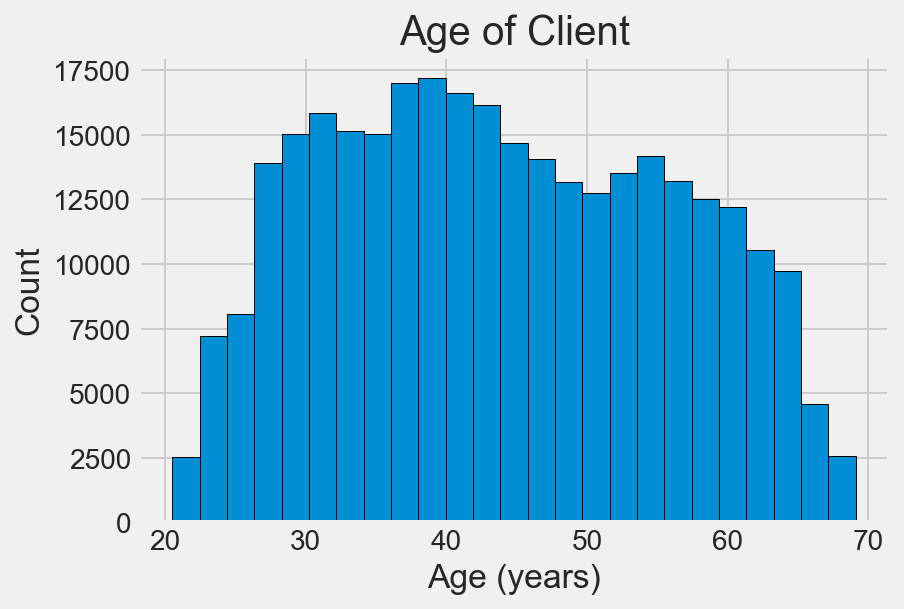

In [321]:
# age of client is in days, we divide by 365 to get the age year


# Plot the distribution of ages in years
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

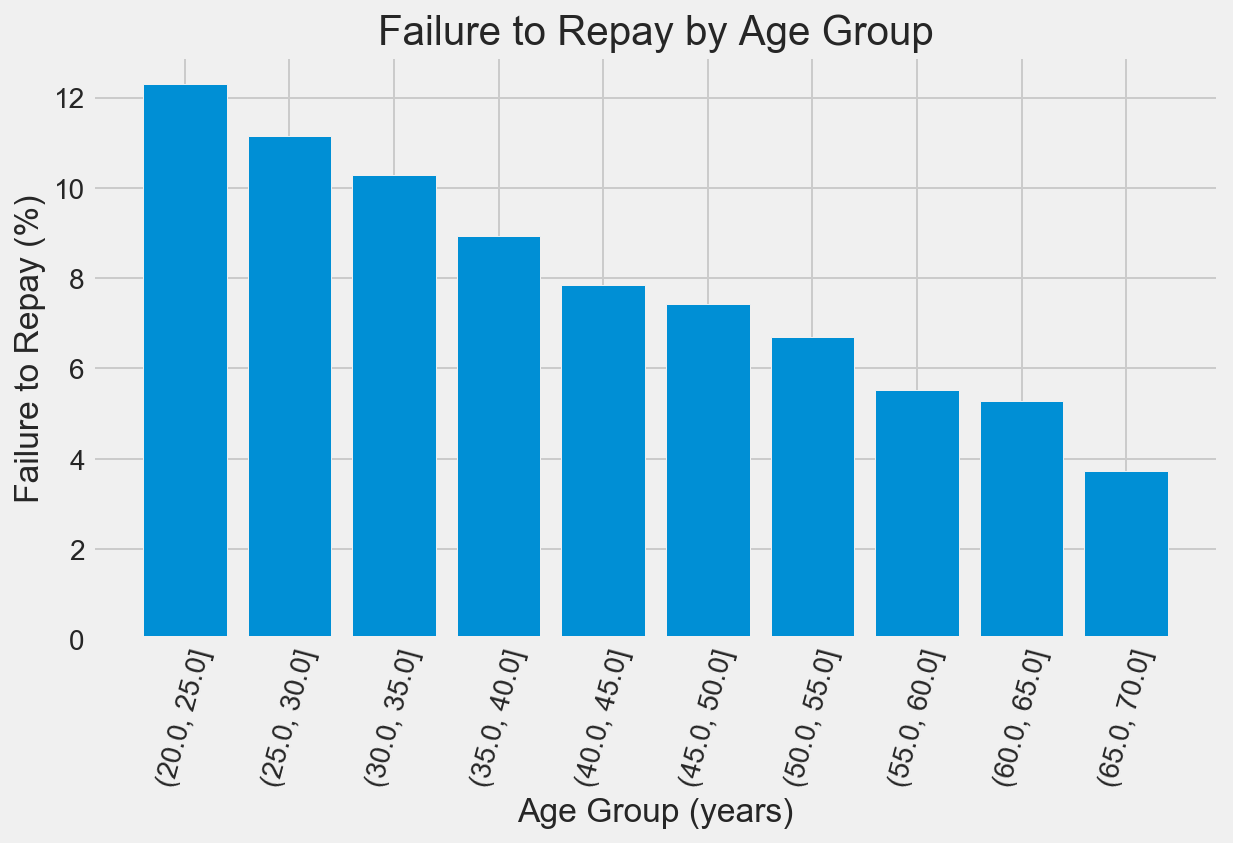

In [322]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (9, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan

# Feature Engineering

In [48]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [49]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [50]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [52]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                      NaN      
Name: TARGET, dtype: float64


In [53]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)


In [54]:
# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 282)
Testing data with polynomial features shape:   (48744, 282)


### Domain Knowledge Features

In [55]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

# percentage of loan amount to income
app_train_domain['credit_income_percent'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
# how much is the annuity payment relative to user's income in terms of percentage
app_train_domain['annuity_income_percent'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
# Loan period
app_train_domain['credit_term'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_ANNUITY']
# How long have they been working in their life to assess their career stability
app_train_domain['days_employed_percent'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
# Calculate interest per annum on credit
app_train_domain['credit_interest'] = (((app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_GOODS_PRICE']) - 1)*100) / app_train_domain['credit_term']

In [56]:
app_test_domain['credit_income_percent'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['annuity_income_percent'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['credit_term'] =  app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_ANNUITY']
app_test_domain['days_employed_percent'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
app_test_domain['credit_interest'] = (((app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_GOODS_PRICE']) - 1)*100) / app_test_domain['credit_term']

In [57]:
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Training data with polynomial features shape: ', app_test_domain.shape)

Training data with polynomial features shape:  (307511, 253)
Training data with polynomial features shape:  (48744, 252)


## Baseline Model


In [58]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 247)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 247)


In [61]:
#Create a function to return summary of classification metrics
def class_scorer(estimator,X,y):
    """
    INPUT: classification estimator, independent variables, target variable
    OUTPUT: confusion matrix, classification report
    """
    predictions = estimator.predict(X)
    pred_proba = estimator.predict_proba(X)
    print(confusion_matrix(y,predictions))
    print(classification_report(y,predictions))
    print()
    print('ROC AUC Score: ',roc_auc_score(y,pred_proba[:,1]))

In [62]:
def model_compare(models, X_train, y_train, score):
    scores_dict = {}
    
    for model in models:
        scores = cross_val_score(model,X_train,y_train,cv=5,verbose=1,n_jobs=-1, scoring=score)
        scores_dict[model]=scores
        
    return pd.DataFrame(scores_dict)

In [63]:
#baseline accuracy:
1-np.mean(y_test)

0.9195323805342829

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(C = 0.0001)
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

### 1. Logistic Regression

In [347]:
# Make the model with the specified regularization parameter

log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38513 18041]
 [ 1671  3278]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56554
           1       0.15      0.66      0.25      4949

   micro avg       0.68      0.68      0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503


ROC AUC Score:  0.7380428905443438


In [292]:
# Save the submission to a csv file
submit.to_csv('log_reg_standard_baseline.csv', index = False)

### 2. Random Forest

In [65]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


[[56416   138]
 [ 4889    60]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.30      0.01      0.02      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.61      0.50      0.49     61503
weighted avg       0.87      0.92      0.88     61503


ROC AUC Score:  0.7076840133187775


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [66]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_baseline = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [67]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.07  
1  100005      0.27  
2  100013      0.04  
3  100028      0.08  
4  100038      0.18

In [296]:
# Save the submission dataframe
submit.to_csv('random_forest_standard_baseline.csv', index = False)

In [68]:
# Function to plot feature importance 
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_standardized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_standardized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Standardized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

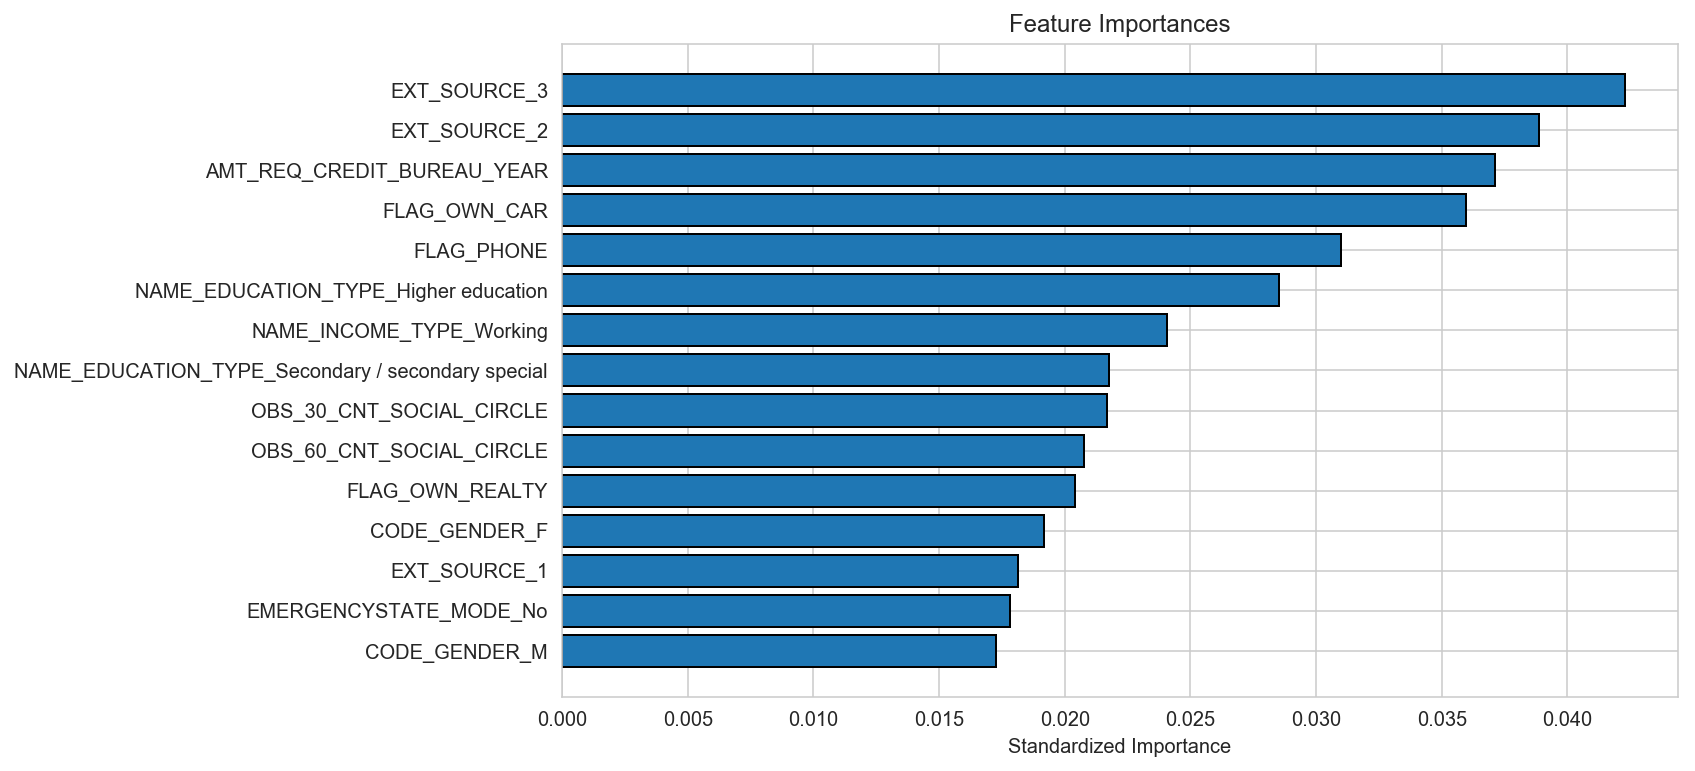

In [69]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances_baseline)

## Polynomial Features 

### 1. Logistic Regression

In [299]:
# Drop the target from the training data
if 'TARGET' in app_train_poly:
    train = app_train_poly.drop(columns = ['TARGET'])
else:
    train = app_train_poly.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test_poly.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 282)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 282)


In [300]:
# Train on the training data

log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[37967 18587]
 [ 1604  3345]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56554
           1       0.15      0.68      0.25      4949

   micro avg       0.67      0.67      0.67     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.67      0.75     61503


ROC AUC Score:  0.7373173516310473


In [301]:
# Make predictions
# Make sure to select the second column only
log_reg_pred_poly = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_poly[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred_poly

submit.head()

SK_ID_CURR    TARGET
0  100001      0.350323
1  100005      0.846529
2  100013      0.287067
3  100028      0.334962
4  100038      0.746016

In [302]:
# Save the submission to a csv file
submit.to_csv('log_reg_standard_poly.csv', index = False)

### 2. Random Forest

In [303]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


[[56186   368]
 [ 4748   201]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.35      0.04      0.07      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.64      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503


ROC AUC Score:  0.7240700800104339


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [304]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_polynomial = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [305]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.07  
1  100005      0.31  
2  100013      0.05  
3  100028      0.14  
4  100038      0.23

In [306]:
# Save the submission dataframe
submit.to_csv('random_forest_standard_poly.csv', index = False)

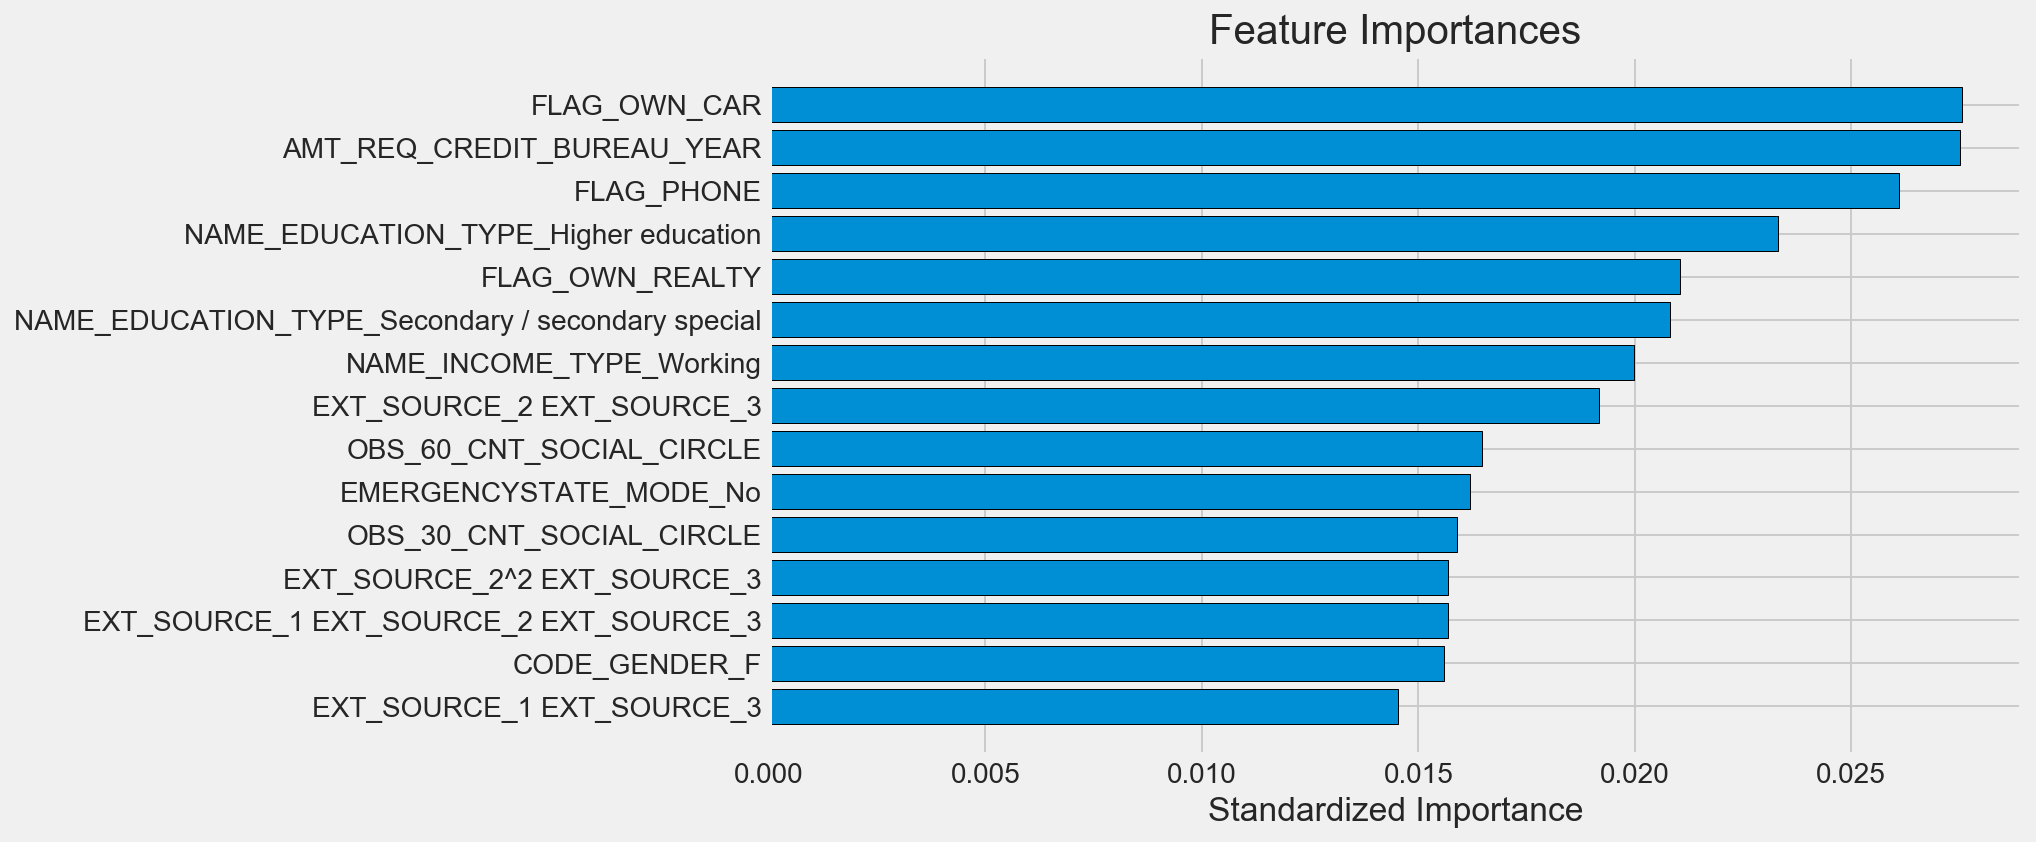

In [307]:
# Show the feature importances for polynomial features
feature_importances_sorted = plot_feature_importances(feature_importances_polynomial)

## Domain Features
### 1. Logistic Regression

In [356]:
# Drop the target from the training data
if 'TARGET' in app_train_domain:
    train = app_train_domain.drop(columns = ['TARGET'])
else:
    train = app_train_domain.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test_domain.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 252)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 252)


In [71]:
# Train on the training data
log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38687 17867]
 [ 1645  3304]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56554
           1       0.16      0.67      0.25      4949

   micro avg       0.68      0.68      0.68     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.68      0.75     61503


ROC AUC Score:  0.7404302611394866


In [405]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
scores = cross_val_score(log_reg, Xs_train, y_train,cv=5,verbose=1,n_jobs=-1)
print('Mean score: ',np.mean(scores))
print('Scores std: ',np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean score:  0.9191692957817933
Scores std:  4.5492622351576826e-05


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [72]:
# Make predictions
# Make sure to select the second column only
log_reg_pred_domain = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.387284
1  100005      0.849317
2  100013      0.290608
3  100028      0.308091
4  100038      0.702371

In [400]:
# Save the submission to a csv file
submit.to_csv('log_reg_standard_domain.csv', index = False)

### 2. Random Forest

In [73]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


[[56371   183]
 [ 4864    85]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.32      0.02      0.03      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.62      0.51      0.49     61503
weighted avg       0.87      0.92      0.88     61503


ROC AUC Score:  0.704848575961421


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [404]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
scores = cross_val_score(random_forest, Xs_train, y_train,cv=5,verbose=1,n_jobs=-1)
print('Mean score: ',np.mean(scores))
print('Scores std: ',np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean score:  0.9192383988290522
Scores std:  3.28064713049821e-05


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.0min finished


In [74]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [75]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.06  
1  100005      0.32  
2  100013      0.07  
3  100028      0.10  
4  100038      0.22

In [404]:
# Save the submission dataframe
submit.to_csv('random_forest_standard_domain.csv', index = False)

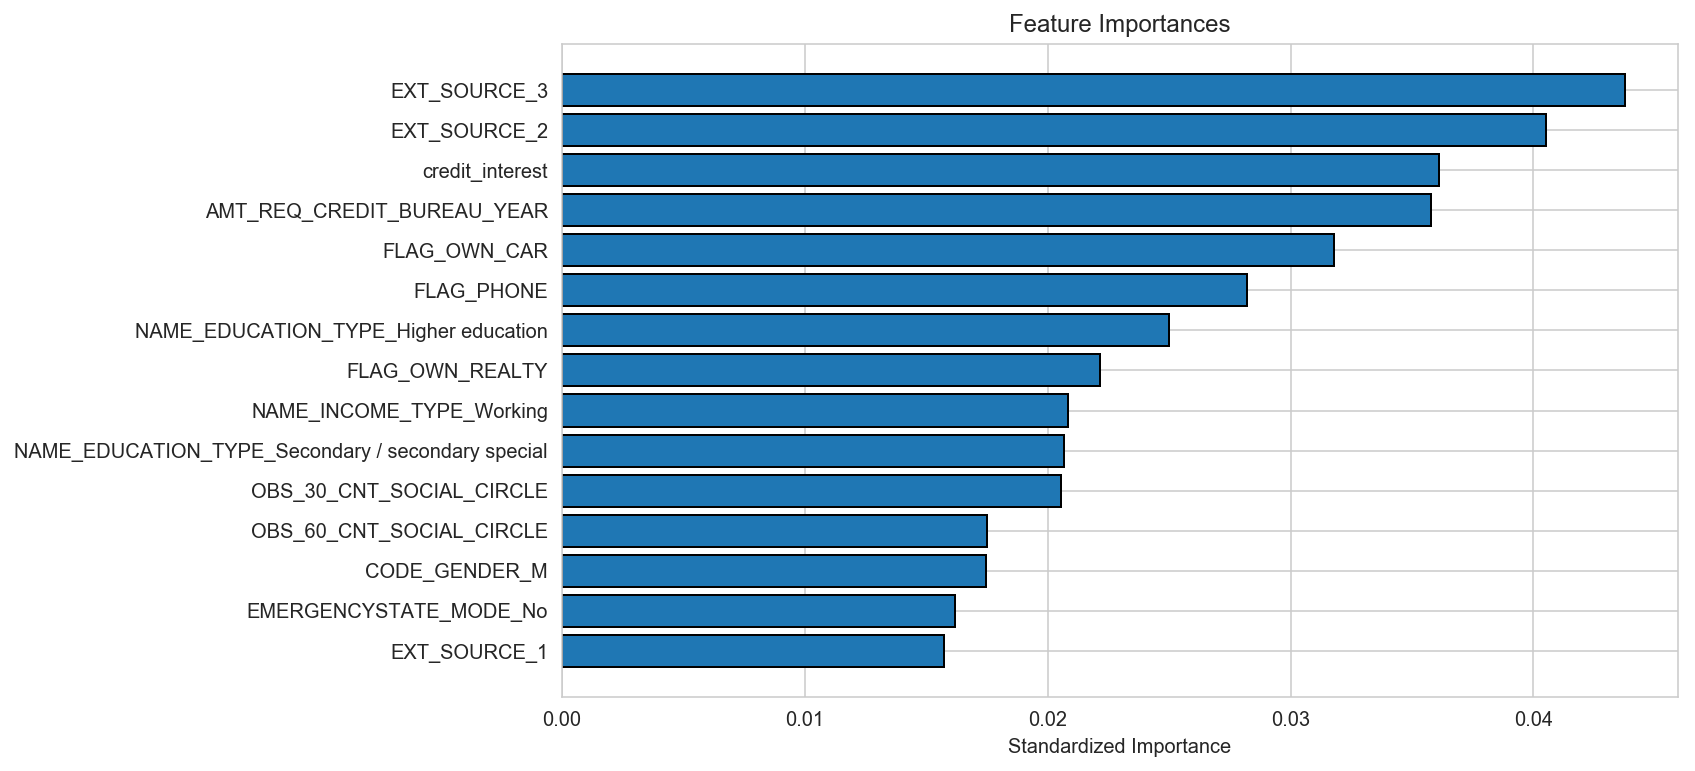

In [76]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

## XGBoost

In [78]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train_smote,y_train_smote)
class_scorer(xgb_class, Xs_test, y_test)

[[56215   339]
 [ 4782   167]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.33      0.03      0.06      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.63      0.51      0.51     61503
weighted avg       0.87      0.92      0.88     61503


ROC AUC Score:  0.7123461031845473


In [406]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
scores = cross_val_score(xgb_class, Xs_train, y_train,cv=5,verbose=1,n_jobs=-1)
print('Mean score: ',np.mean(scores))
print('Scores std: ',np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean score:  0.9193766059149293
Scores std:  0.00011505846606862946


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.9min finished


In [79]:
# Extract feature importances
feature_importance_values = xgb_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

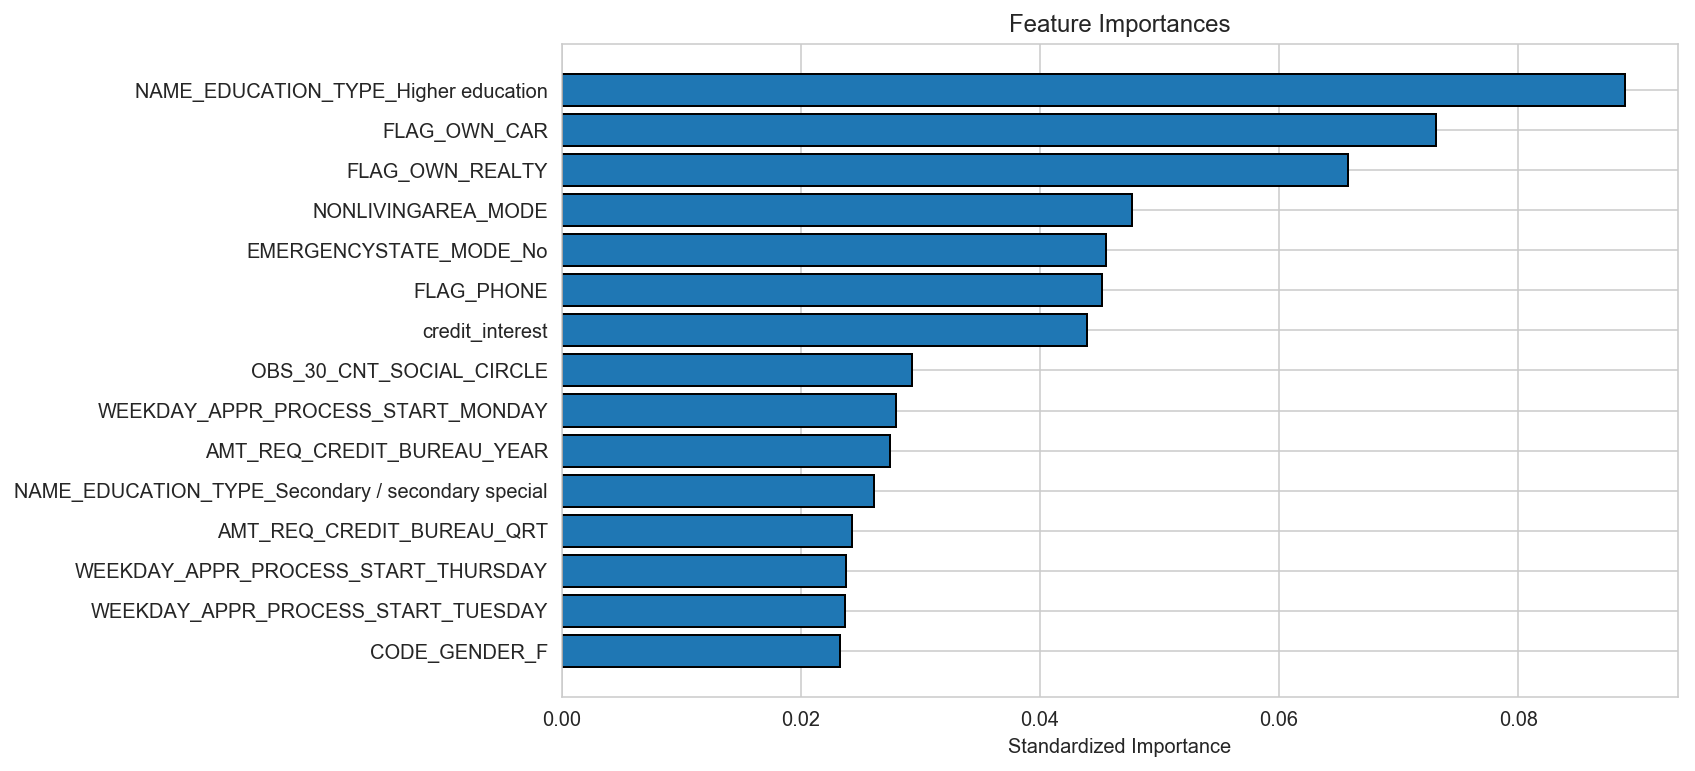

In [80]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [81]:
# Make predictions
# Make sure to select the second column only
xgb_class_pred_domain = xgb_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = xgb_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.115622
1  100005      0.395564
2  100013      0.044606
3  100028      0.106848
4  100038      0.248189

In [82]:
# Save the submission to a csv file
submit.to_csv('xgb_class_standard_domain.csv', index = False)

## CatBoost

In [357]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(X_train_smote,y_train_smote)
class_scorer(cat_class, Xs_test, y_test)

Learning rate set to 0.094537
0:	learn: 0.6296218	total: 532ms	remaining: 8m 51s
1:	learn: 0.5804389	total: 985ms	remaining: 8m 11s
2:	learn: 0.5174239	total: 1.54s	remaining: 8m 32s
3:	learn: 0.4672667	total: 1.98s	remaining: 8m 12s
4:	learn: 0.4386171	total: 2.43s	remaining: 8m 2s
5:	learn: 0.4197206	total: 2.91s	remaining: 8m 1s
6:	learn: 0.3862324	total: 3.33s	remaining: 7m 52s
7:	learn: 0.3602174	total: 3.78s	remaining: 7m 48s
8:	learn: 0.3393853	total: 4.23s	remaining: 7m 45s
9:	learn: 0.3236192	total: 4.68s	remaining: 7m 43s
10:	learn: 0.3165923	total: 5.04s	remaining: 7m 33s
11:	learn: 0.3009654	total: 5.45s	remaining: 7m 28s
12:	learn: 0.2818721	total: 5.95s	remaining: 7m 31s
13:	learn: 0.2679357	total: 6.36s	remaining: 7m 27s
14:	learn: 0.2548544	total: 6.82s	remaining: 7m 28s
15:	learn: 0.2482504	total: 7.19s	remaining: 7m 22s
16:	learn: 0.2420756	total: 7.61s	remaining: 7m 19s
17:	learn: 0.2331171	total: 8.07s	remaining: 7m 20s
18:	learn: 0.2271162	total: 8.49s	remaining: 7

In [400]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
scores = cross_val_score(cat_class, Xs_train, y_train,cv=5,verbose=1,n_jobs=-1)
print('Mean score: ',np.mean(scores))
print('Scores std: ',np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean score:  0.9193524779686456
Scores std:  0.00018786093939153803


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.2min finished


In [401]:
#baseline accuracy:
1-np.mean(y_train)

0.919205879483594

In [358]:
# Make predictions
# Make sure to select the second column only
cat_class_pred_domain = cat_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = cat_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.032912
1  100005      0.156954
2  100013      0.012695
3  100028      0.035771
4  100038      0.119711

In [323]:
# Save the submission to a csv file
submit.to_csv('cat_class_standard_domain.csv', index = False)

In [360]:
# Extract feature importances
feature_importance_values = cat_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

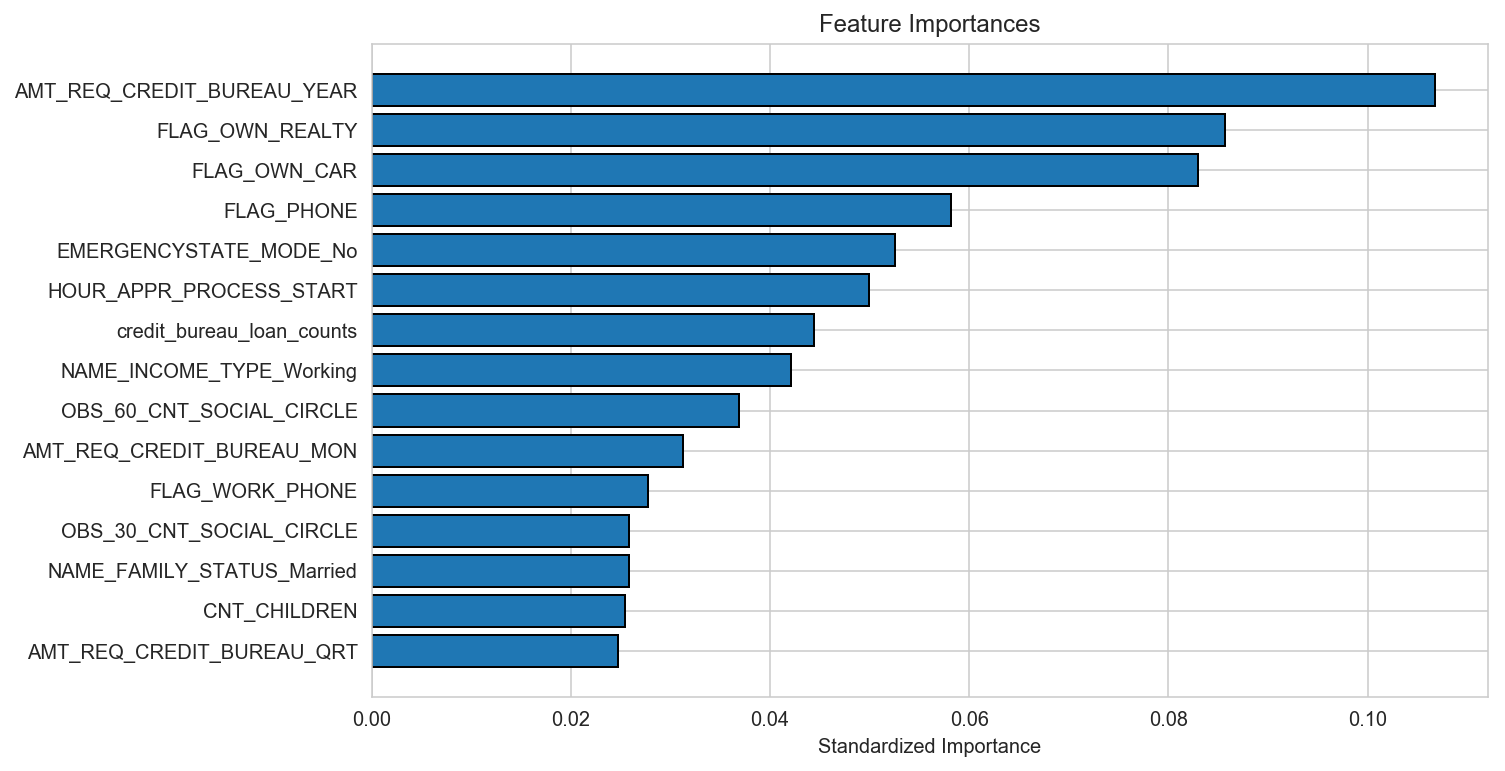

In [361]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

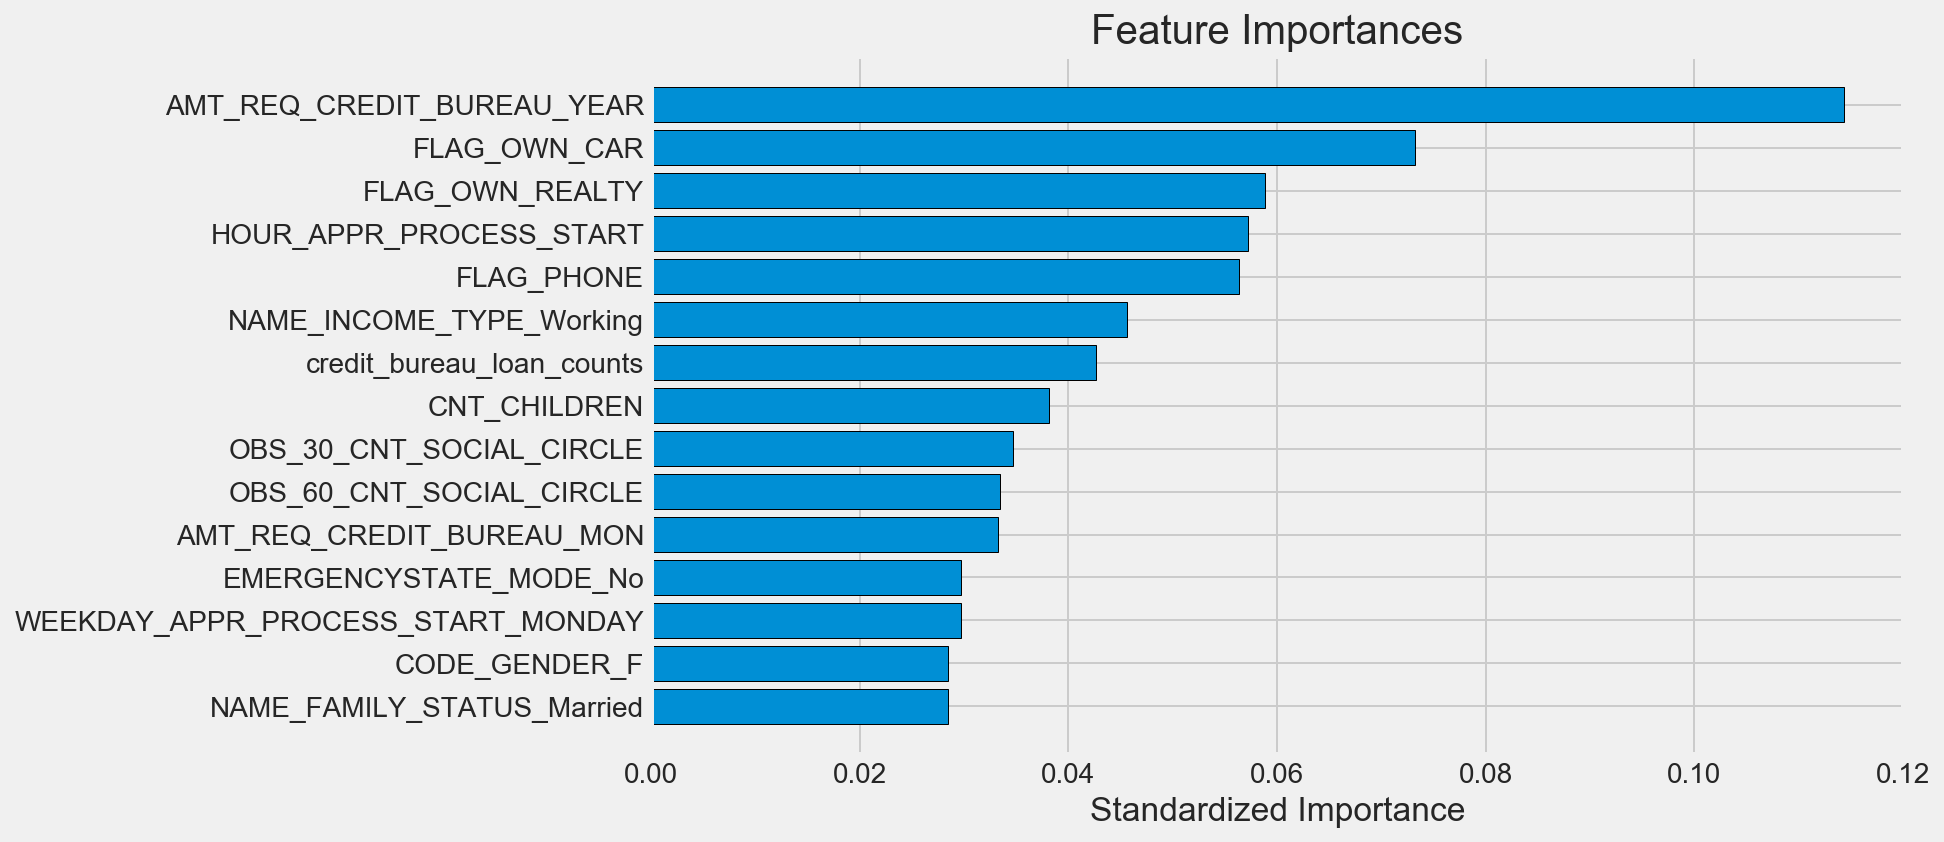

In [325]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

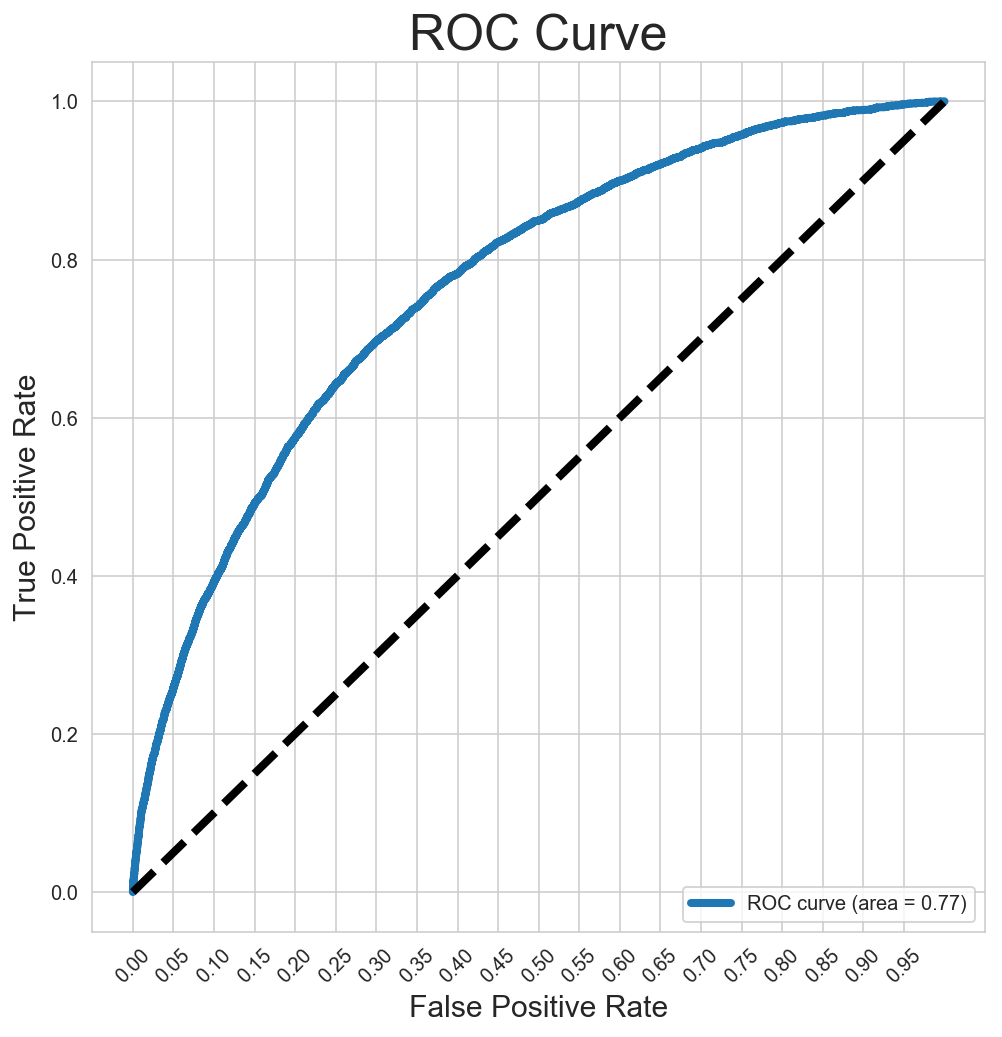

In [395]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

predprob_q1 = cat_class.predict_proba(Xs_test)

fpr, tpr, thresholds = roc_curve(y_test, predprob_q1[:,1])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth =4)
plt.plot([0,1],[0,1], 'k--', linewidth=4)

plt.xlim([-0.05,1.0])
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0,1,0.05),rotation = 45)

plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC Curve', fontsize=25)
plt.legend(loc='lower right')

plt.show()

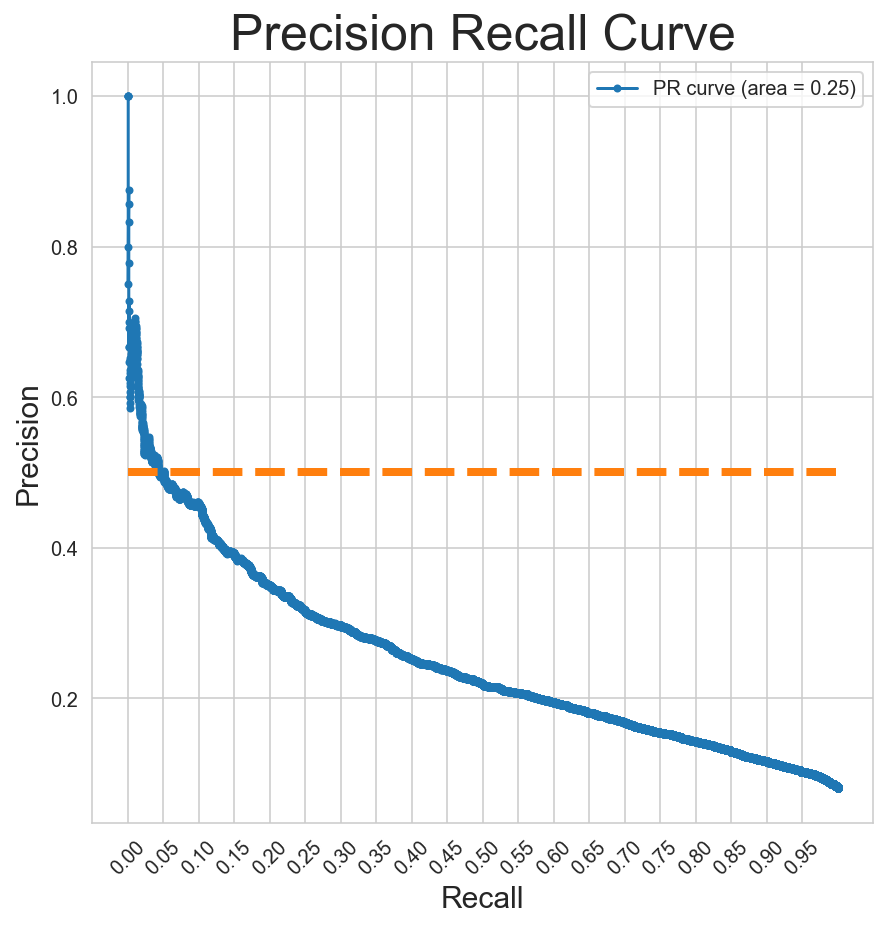

In [408]:
precision, recall, thresholds = precision_recall_curve(y_test, predprob_q1[:,1])
auc_score = auc(recall, precision)


plt.figure(figsize=(7,7))
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % auc_score, marker='.')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', linewidth=4)

plt.xlim([-0.05,1.0])
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0,1,0.05),rotation = 45)

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.title('Precision Recall Curve', fontsize=25)
plt.legend(loc='upper right')

plt.show()

## Grid Search

In [ ]:
def log_reg_w_grid(X,y):
    """
    Gridsearch for Logistic Regression hyperparameters
    INPUT: train set of independent and target variable
    OUTPUT: the model fitted with the best estimator
    """
    
    log_reg = LogisticRegression()

    log_reg_params = {
        'penalty':['l1','l2'],
        'C':np.logspace(-3,2,30),
        'solver':['liblinear']
    }

    grid_log_reg = GridSearchCV(log_reg,param_grid=log_reg_params,cv=5,n_jobs=-1,verbose=1)
    grid_log_reg.fit(X,y)
    
    print(grid_log_reg.best_score_)
    print(grid_log_reg.best_params_)
    
    return grid_logr.best_estimator_

In [ ]:
#optimal_log_reg = log_reg_w_grid(X_train_smote,y_train_smote)
#class_scorer(optimal_log_reg,X_test,y_test)

In [ ]:
def rfc_w_grid(X,y):
    rfc = RandomForestClassifier()

    rfc_params = {
        'n_estimators':[300],
        'min_samples_split':range(2,8)
    }

    grid_rfc = GridSearchCV(rfc,param_grid=rfc_params,cv=5,n_jobs=-1,verbose=1)
    grid_rfc.fit(X,y)
    
    print('best score: ', grid_rfc.best_score_)
    print('best parameters: ', grid_rfc.best_params_)
    
    return grid_rfc.best_estimator_

In [ ]:
#optimal_rfc = rfc_w_grid(X_train_smote,y_train_smote)
#class_scorer(optimal_rfc,X_test,y_test)

## Try SelectKBest (Poor Results - Not suitable for Classification - Only regressor)

In [623]:
cols = list(app_train_domain.drop(columns = ['TARGET']).columns)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(app_train_domain.drop(columns = ['TARGET']).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [624]:
KbestFeatures = featureScores.nlargest(40,'Score')['Specs'].tolist()

KbestFeatures_train = app_train_domain[KbestFeatures]
KbestFeatures_train['TARGET']=app_train_domain['TARGET']

KbestFeatures_test = app_test_domain[KbestFeatures]
print(KbestFeatures_train.shape)
print(KbestFeatures_test.shape)

(307511, 41)
(48744, 40)


In [625]:
# Drop the target from the training data
if 'TARGET' in KbestFeatures_train:
    train = KbestFeatures_train.drop(columns = ['TARGET'])
else:
    train = KbestFeatures_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = KbestFeatures_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 40)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 40)


In [626]:
# Train on the training data
log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[37929 18625]
 [ 1643  3306]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56554
           1       0.15      0.67      0.25      4949

   micro avg       0.67      0.67      0.67     61503
   macro avg       0.55      0.67      0.52     61503
weighted avg       0.89      0.67      0.75     61503


ROC AUC Score:  0.7312142827023425


In [631]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0  100001      0.479223
1  100005      0.624916
2  100013      0.280390
3  100028      0.257918
4  100038      0.580486

In [632]:
# Save the submission to a csv file
submit.to_csv('log_reg_standard_domain_kbest.csv', index = False)

In [627]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


[[54162  2392]
 [ 4296   653]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     56554
           1       0.21      0.13      0.16      4949

   micro avg       0.89      0.89      0.89     61503
   macro avg       0.57      0.54      0.55     61503
weighted avg       0.87      0.89      0.88     61503


ROC AUC Score:  0.6987553771316386


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [634]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [635]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.12  
1  100005      0.31  
2  100013      0.13  
3  100028      0.10  
4  100038      0.42

In [636]:
# Save the submission dataframe
submit.to_csv('random_forest_standard_domain_kbest.csv', index = False)

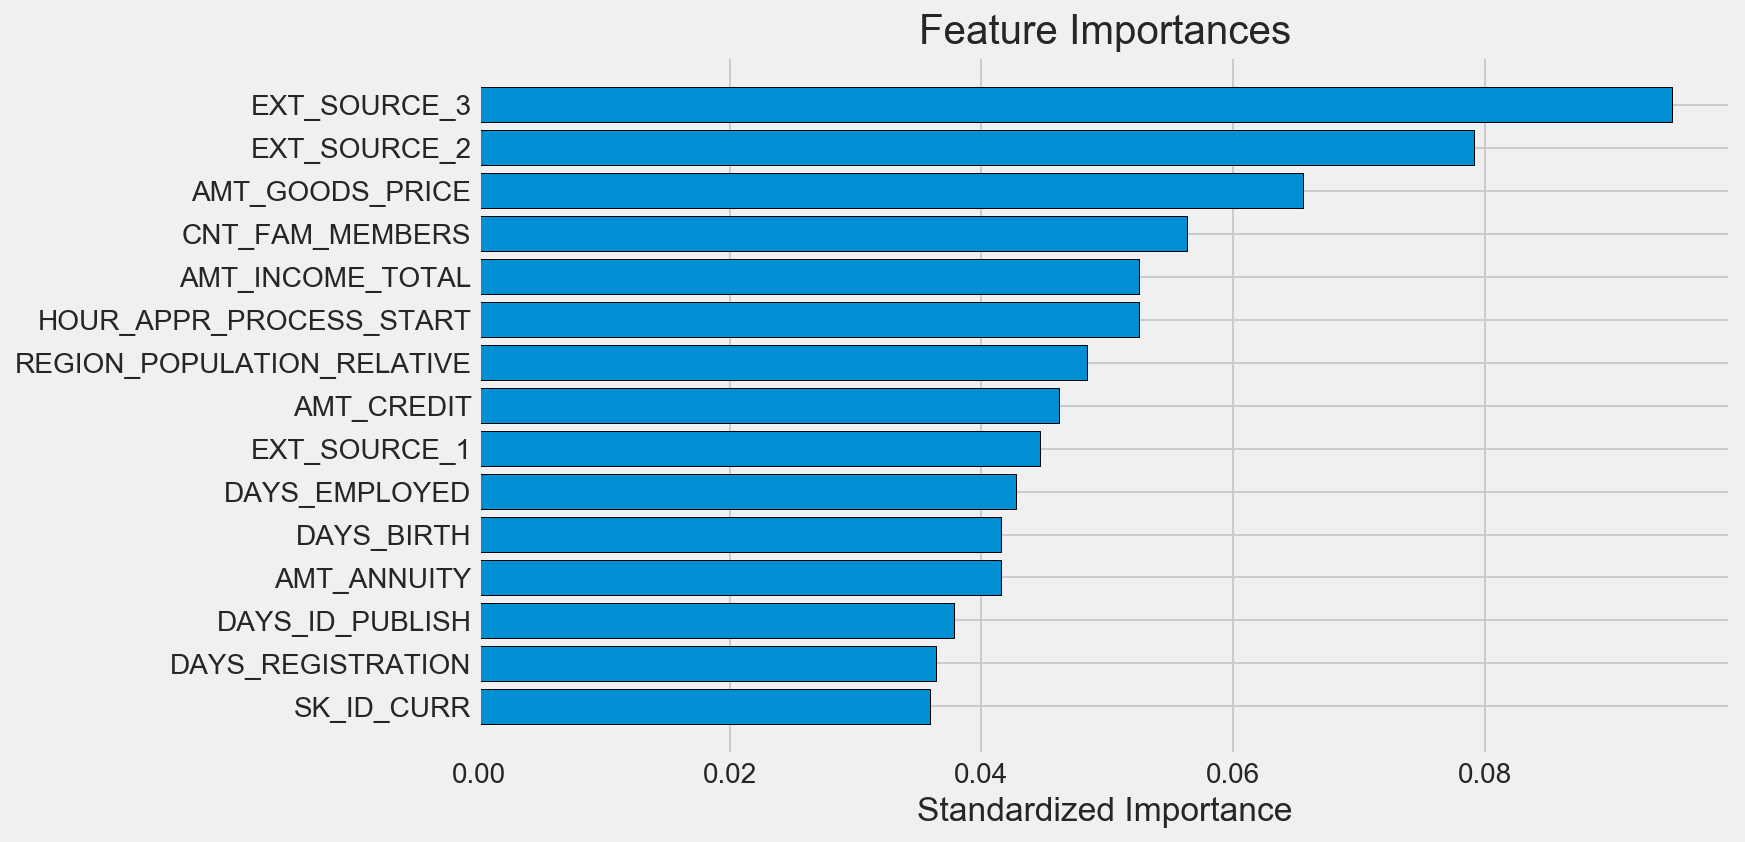

In [637]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [245]:
app_train_domain.shape

(307511, 253)

In [246]:
app_train_domain.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'credit_income_percent', 'annuity_income_percent', 'credit_term',
       'days_employed_percent', 'credit_interest'],
      dtype='object', length=253)

In [466]:
abs_corr = app_train_domain.corr().abs().sort_values('TARGET', ascending = False)

In [473]:
abs_corr['TARGET'].head(15)

TARGET                                  1.000000
EXT_SOURCE_3                            0.178919
EXT_SOURCE_2                            0.160472
EXT_SOURCE_1                            0.155317
DAYS_BIRTH                              0.078239
credit_interest                         0.077815
DAYS_EMPLOYED                           0.074958
days_employed_percent                   0.067955
REGION_RATING_CLIENT_W_CITY             0.060893
REGION_RATING_CLIENT                    0.058899
NAME_INCOME_TYPE_Working                0.057481
NAME_EDUCATION_TYPE_Higher education    0.056593
DAYS_LAST_PHONE_CHANGE                  0.055218
CODE_GENDER_M                           0.054713
CODE_GENDER_F                           0.054704
Name: TARGET, dtype: float64

In [291]:
app_train_domain.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'credit_income_percent', 'annuity_income_percent', 'credit_term',
       'days_employed_percent', 'credit_interest'],
      dtype='object', length=254)

## Manual Feature Elemination through EDA Visualization

In [333]:
manual_feature_elimination_train = app_train_domain
print(len(manual_feature_elimination_train.columns.tolist()))

manual_feature_elimination_test = app_test_domain
print(len(manual_feature_elimination_test.columns.tolist()))

253
252


In [334]:
# Drop Female Gender (Male Gender column already exists, its duplicates)
manual_feature_elimination_train = manual_feature_elimination_train.drop(['CODE_GENDER_F'], axis=1)
print(len(manual_feature_elimination_train.columns.tolist()))

manual_feature_elimination_test = manual_feature_elimination_test.drop(['CODE_GENDER_F'], axis=1)
print(len(manual_feature_elimination_test.columns.tolist()))

252
251


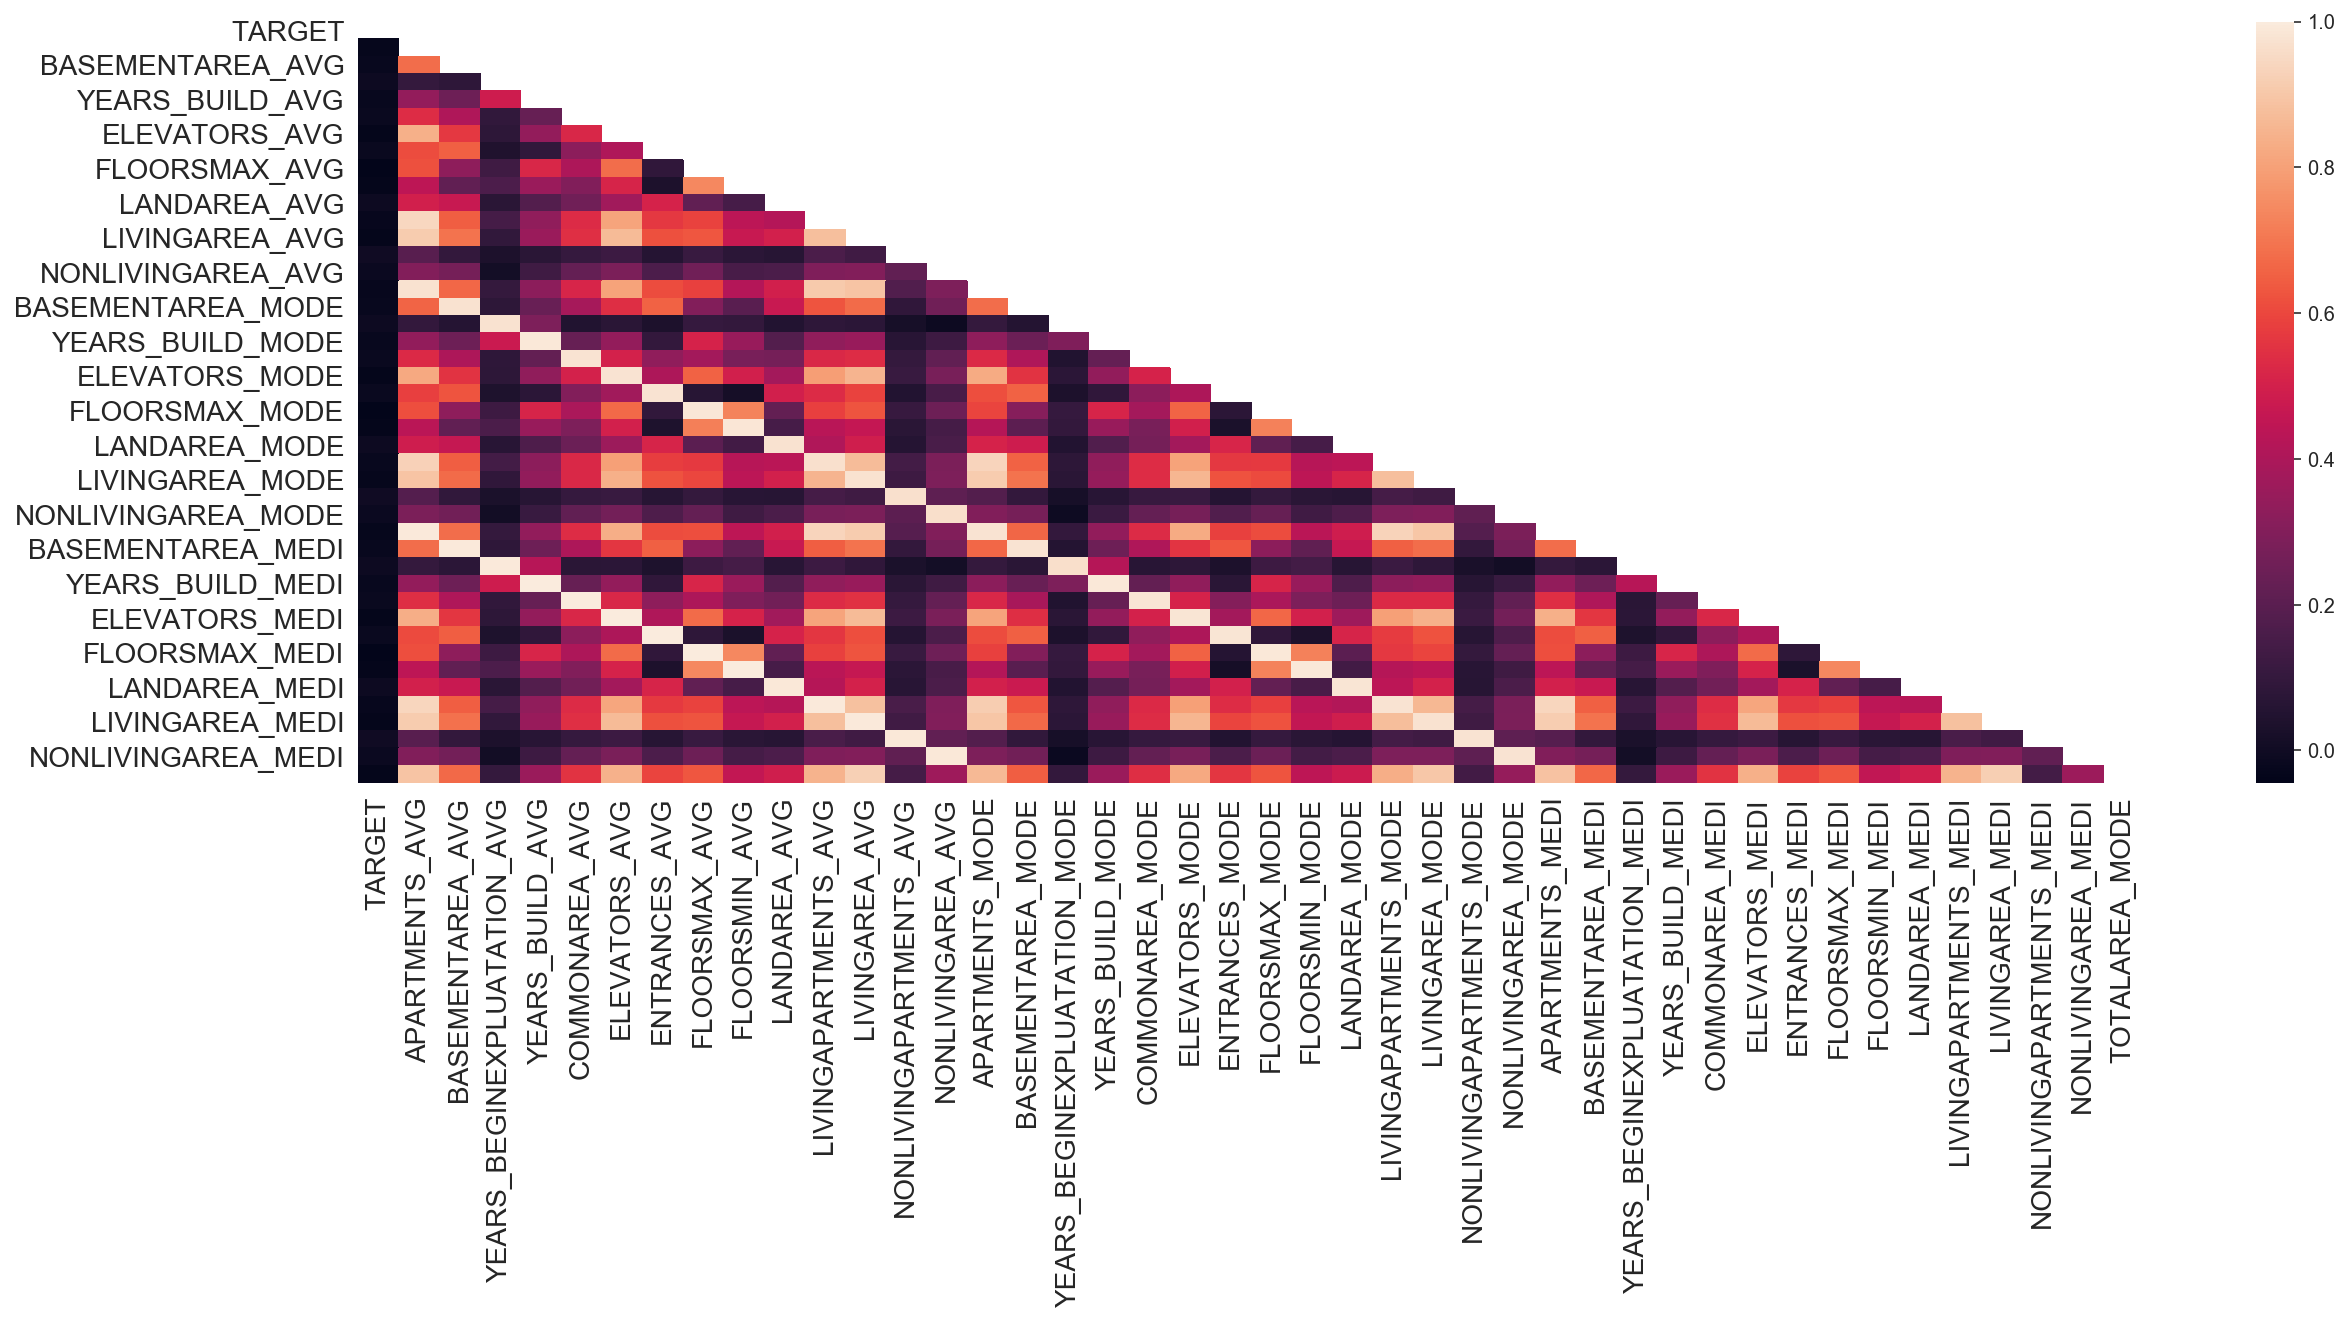

In [250]:
# recall from earlier that these were mainly the features that has more than 50% missing values.
# let's look at its correlation to TARGET and if it is ok to drop
manual_corr = app_train_domain[['TARGET','APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']].corr()

fig, ax = plt.subplots(figsize=(20,7))
mask = np.zeros_like(manual_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(manual_corr, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

In [335]:
# Drop housing features since it has ZERO/almost zero correlation to target variable 
manual_feature_elimination_train = manual_feature_elimination_train.drop(['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE'], axis=1)
print(len(manual_feature_elimination_train.columns.tolist()))

manual_feature_elimination_test = manual_feature_elimination_test.drop(['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE'], axis=1)
print(len(manual_feature_elimination_test.columns.tolist()))

209
208


In [336]:
# Drop house wall features since it doesnt make sense
manual_feature_elimination_train = manual_feature_elimination_train.drop(['WALLSMATERIAL_MODE_Block',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Panel',
 'WALLSMATERIAL_MODE_Stone, brick',
 'WALLSMATERIAL_MODE_Wooden',], axis=1)
print(len(manual_feature_elimination_train.columns.tolist()))

manual_feature_elimination_test = manual_feature_elimination_test.drop(['WALLSMATERIAL_MODE_Block',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Panel',
 'WALLSMATERIAL_MODE_Stone, brick',
 'WALLSMATERIAL_MODE_Wooden',], axis=1)
print(len(manual_feature_elimination_test.columns.tolist()))

202
201


In [337]:
# Drop day of processing 
manual_feature_elimination_train = manual_feature_elimination_train.drop(['WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY'], axis=1)
print(len(manual_feature_elimination_train.columns.tolist()))

manual_feature_elimination_test = manual_feature_elimination_test.drop(['WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY'], axis=1)
print(len(manual_feature_elimination_test.columns.tolist()))

195
194


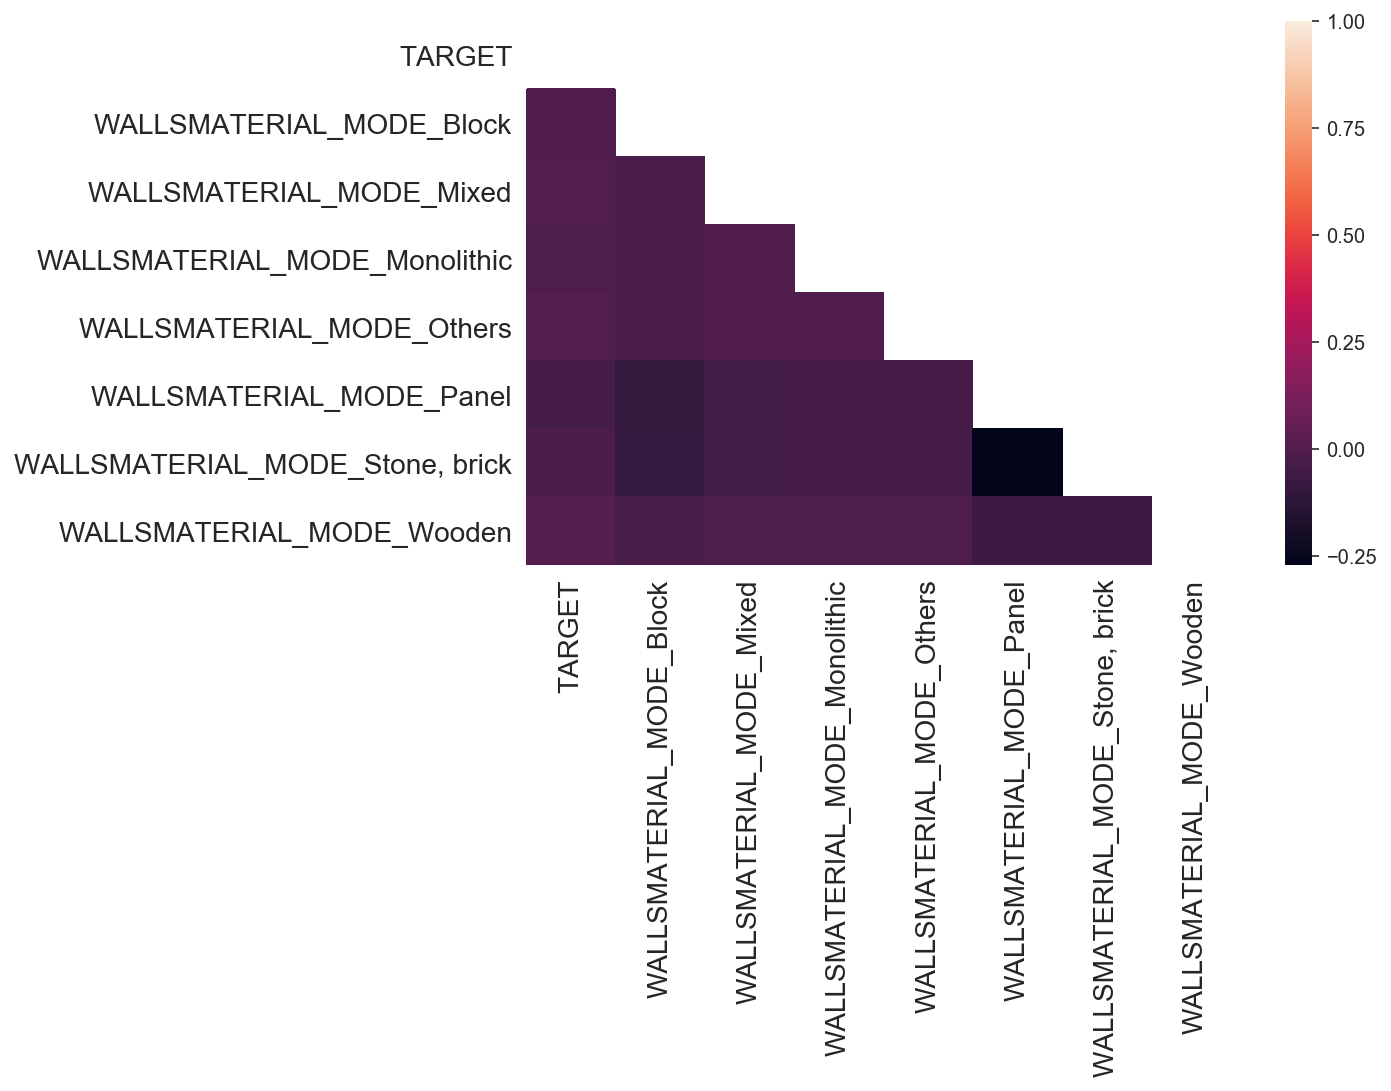

In [193]:
manual_corr = app_train_domain[['TARGET','WALLSMATERIAL_MODE_Block',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Panel',
 'WALLSMATERIAL_MODE_Stone, brick',
 'WALLSMATERIAL_MODE_Wooden',]].corr()

fig, ax = plt.subplots(figsize=(8,5))
mask = np.zeros_like(manual_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(manual_corr, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

In [338]:
manual_feature_elimination_train.columns.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMEN

In [339]:
# Drop the target from the training data
if 'TARGET' in manual_feature_elimination_train:
    train = manual_feature_elimination_train.drop(columns = ['TARGET'])
else:
    train = manual_feature_elimination_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = manual_feature_elimination_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 194)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 194)


## Logistic Regression

In [92]:
# Train on the training data
log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38548 18006]
 [ 1628  3321]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56554
           1       0.16      0.67      0.25      4949

   micro avg       0.68      0.68      0.68     61503
   macro avg       0.56      0.68      0.52     61503
weighted avg       0.89      0.68      0.75     61503


ROC AUC Score:  0.7425152297680783


In [100]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0  100001      0.395515
1  100005      0.833087
2  100013      0.281483
3  100028      0.347365
4  100038      0.674094

In [581]:
# Save the submission to a csv file
submit.to_csv('log_reg_standard_domain_manual_eliminate.csv', index = False)

## Random Forest

In [94]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


[[56357   197]
 [ 4838   111]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.36      0.02      0.04      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.64      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503


ROC AUC Score:  0.718605735999146


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [95]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [96]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.06  
1  100005      0.30  
2  100013      0.05  
3  100028      0.07  
4  100038      0.27

In [585]:
# Save the submission dataframe
submit.to_csv('random_forest_standard_domain_manual_eliminate.csv', index = False)

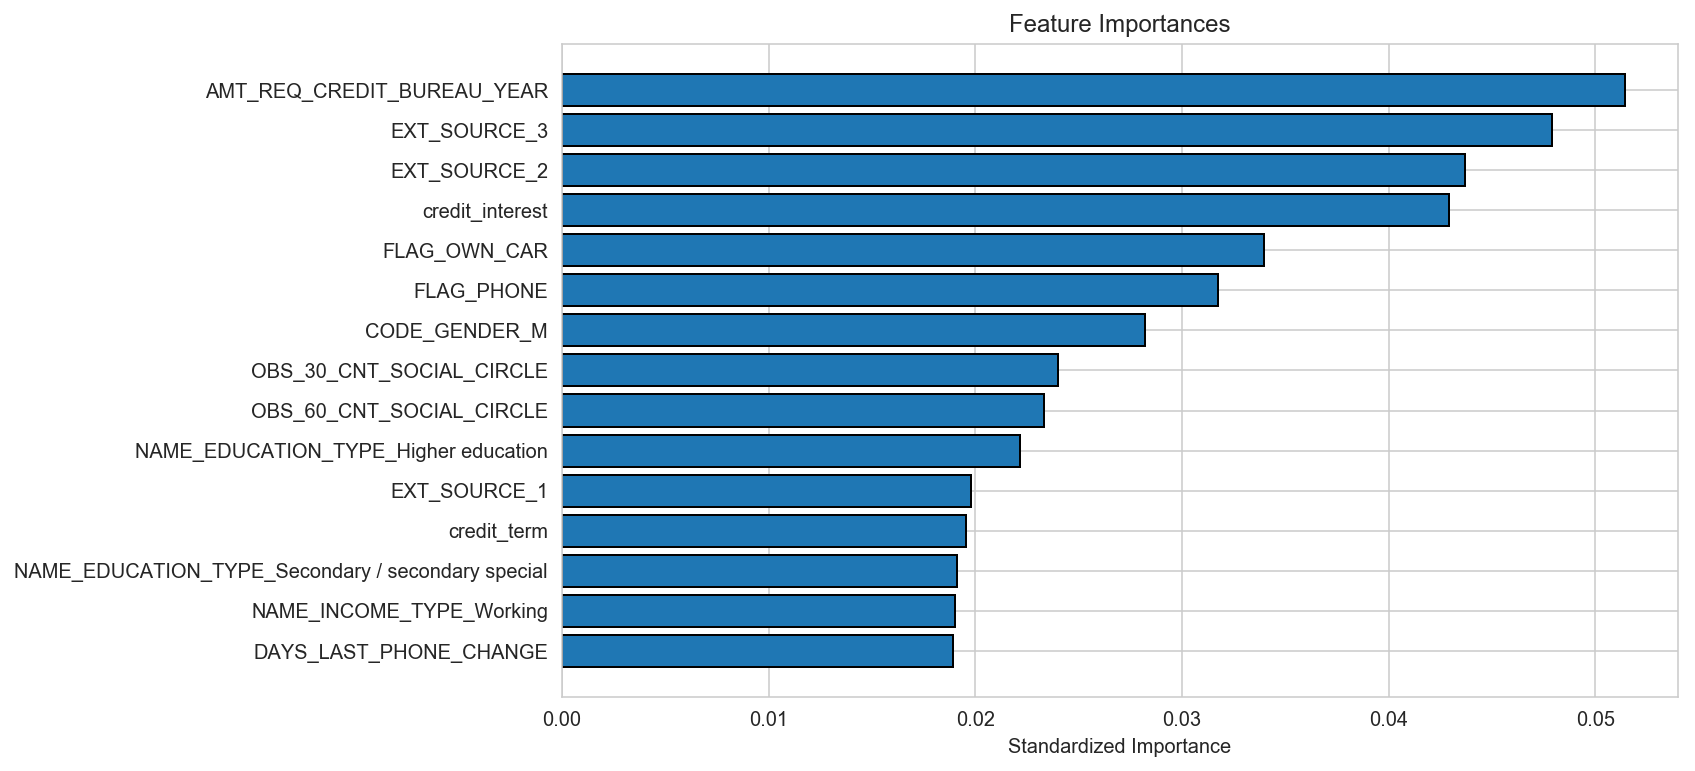

In [97]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [587]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train_smote,y_train_smote)
class_scorer(xgb_class, Xs_test, y_test)

[[56025   529]
 [ 4724   225]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.30      0.05      0.08      4949

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.61      0.52      0.52     61503
weighted avg       0.87      0.91      0.88     61503


ROC AUC Score:  0.715054810258183


In [588]:
# Make predictions
# Make sure to select the second column only
xgb_class_pred_domain = xgb_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = xgb_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.123491
1  100005      0.404456
2  100013      0.047880
3  100028      0.141827
4  100038      0.261723

In [589]:
# Save the submission to a csv file
submit.to_csv('xgb_class_standard_domain_manual_eliminate.csv', index = False)

In [340]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(X_train_smote,y_train_smote)
class_scorer(cat_class, Xs_test, y_test)

Learning rate set to 0.094537
0:	learn: 0.6328410	total: 394ms	remaining: 6m 33s
1:	learn: 0.5784448	total: 1.04s	remaining: 8m 38s
2:	learn: 0.5246352	total: 1.4s	remaining: 7m 45s
3:	learn: 0.4906050	total: 1.88s	remaining: 7m 48s
4:	learn: 0.4454261	total: 2.77s	remaining: 9m 12s
5:	learn: 0.4105904	total: 3.26s	remaining: 9m
6:	learn: 0.3835617	total: 3.79s	remaining: 8m 57s
7:	learn: 0.3570577	total: 4.28s	remaining: 8m 50s
8:	learn: 0.3374799	total: 4.63s	remaining: 8m 29s
9:	learn: 0.3099430	total: 5.02s	remaining: 8m 17s
10:	learn: 0.3022980	total: 5.36s	remaining: 8m 1s
11:	learn: 0.2880272	total: 5.79s	remaining: 7m 56s
12:	learn: 0.2801057	total: 6.09s	remaining: 7m 42s
13:	learn: 0.2685660	total: 6.48s	remaining: 7m 36s
14:	learn: 0.2587245	total: 6.81s	remaining: 7m 27s
15:	learn: 0.2498927	total: 7.18s	remaining: 7m 21s
16:	learn: 0.2441733	total: 7.56s	remaining: 7m 17s
17:	learn: 0.2378689	total: 7.88s	remaining: 7m 10s
18:	learn: 0.2333678	total: 8.25s	remaining: 7m 5s

In [341]:
# Make predictions
# Make sure to select the second column only
cat_class_pred_domain = cat_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = cat_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.032821
1  100005      0.142755
2  100013      0.010854
3  100028      0.031859
4  100038      0.143174

In [593]:
# Save the submission to a csv file
submit.to_csv('cat_class_standard_domain_manual_eliminate.csv', index = False)

In [342]:
# Extract feature importances
feature_importance_values = cat_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

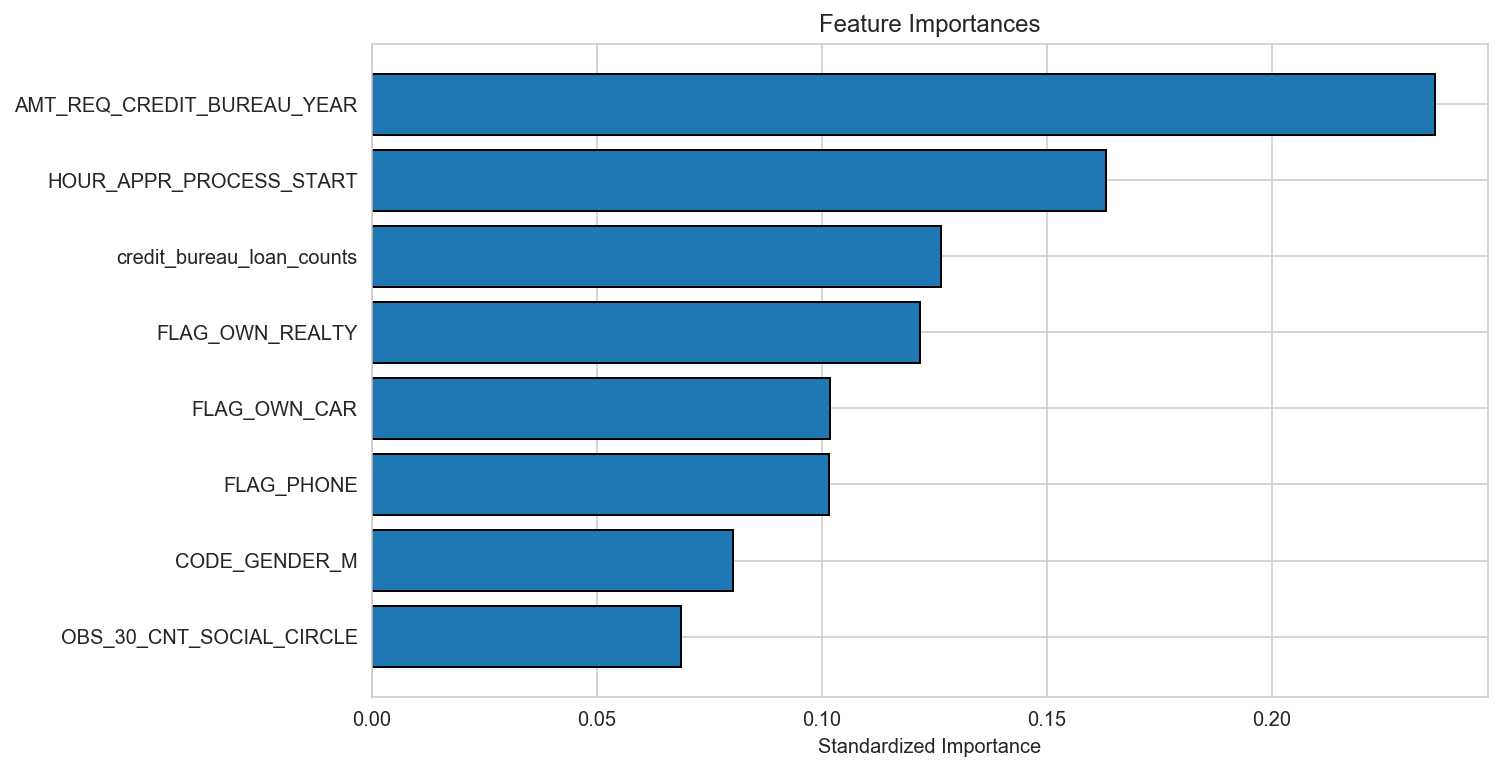

In [355]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain.sort_values(by=['importance'],ascending=False).head(8)
)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predprob_q1[:,1])
auc_score = auc(recall, precision)

pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()
print('AUC: %.3f' % auc_score)

# FINAL MODEL

## Further Feature Elimination

In [797]:
manual_feature_elimination_train

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       100002      0                   0             1                 
1       100003      0                   0             0                 
2       100004      1                   1             1                 
3       100006      0                   0             1                 
4       100007      0                   0             1                 
5       100008      0                   0             1                 
6       100009      0                   1             1                 
7       100010      0                   1             1                 
8       100011      0                   0             1                 
9       100012      1                   0             1                 
10      100014      0                   0             1                 
11      100015      0                   0             1                 
12      100016      0                   0             1                 
13      100017      0                   1             0                 
14      100018      0                   0             1                 
15      100019      0                   1             1                 
16      100020      0                   0             0                 
17      100021      1                   0             1                 
18      100022      1                   0             1                 
19      100023      0                   0             1                 
20      100024      1                   1             1                 
21      100025      0                   1             1                 
22      100026      0                   0             0                 
23      100027      0                   0             1                 
24      100029      0                   1             0                 
25      100030      0                   0             1                 
26      100031      0                   0             1                 
27      100032      0                   0             1                 
28      100033      0                   1             1                 
29      100034      1                   0             1                 
...        ...     ..                  ..            ..                 
307481  456225      0                   0             1                 
307482  456226      0                   1             1                 
307483  456227      0                   0             1                 
307484  456228      0                   1             0                 
307485  456229      1                   0             1                 
307486  456230      0                   1             1                 
307487  456231      0                   0             1                 
307488  456232      0                   0             0                 
307489  456233      0                   0             1                 
307490  456234      0                   0             1                 
307491  456235      0                   1             1                 
307492  456236      0                   1             1                 
307493  456237      0                   0             1                 
307494  456238      0                   1             0                 
307495  456239      0                   1             0                 
307496  456240      1                   0             0                 
307497  456241      0                   1             1                 
307498  456242      0                   1             1                 
307499  456243      0                   0             1                 
307500  456244      0                   0             1                 
307501  456245      0                   0             1                 
307502  456246      0                   0             1                 
307503  456247      0                   0             1           

In [200]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = manual_feature_elimination_train.corr().abs()
corr_matrix.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR          1.000000    0.001654            0.001216       
NAME_CONTRACT_TYPE  0.001654    1.000000            0.004022       
FLAG_OWN_CAR        0.001216    0.004022            1.000000       
FLAG_OWN_REALTY     0.000703    0.067177            0.002817       
CNT_CHILDREN        0.001129    0.029998            0.102023       

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          0.000703         0.001129      0.001820           
NAME_CONTRACT_TYPE  0.067177         0.029998      0.003531           
FLAG_OWN_CAR        0.002817         0.102023      0.083383           
FLAG_OWN_REALTY     1.000000         0.002366      0.002934           
CNT_CHILDREN        0.002366         1.000000      0.012882           

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR          0.000343    0.000433     0.000232          
NAME_CONTRACT_TYPE  0.221648    0.241544     0.185850          
FLAG_OWN_CAR        0.116225    0.141588     0.120310          
FLAG_OWN_REALTY     0.039270    0.005225     0.045537          
CNT_CHILDREN        0.002145    0.021374     0.001827          

                    REGION_POPULATION_RELATIVE       ...         \
SK_ID_CURR          0.000849                         ...          
NAME_CONTRACT_TYPE  0.026867                         ...          
FLAG_OWN_CAR        0.041314                         ...          
FLAG_OWN_REALTY     0.015175                         ...          
CNT_CHILDREN        0.025573                         ...          

                    HOUSETYPE_MODE_specific housing  \
SK_ID_CURR          0.001344                          
NAME_CONTRACT_TYPE  0.000203                          
FLAG_OWN_CAR        0.009542                          
FLAG_OWN_REALTY     0.005552                          
CNT_CHILDREN        0.001821                          

                    HOUSETYPE_MODE_terraced house  EMERGENCYSTATE_MODE_No  \
SK_ID_CURR          0.000553                       0.000510                 
NAME_CONTRACT_TYPE  0.000070                       0.027372                 
FLAG_OWN_CAR        0.002762                       0.034754                 
FLAG_OWN_REALTY     0.007176                       0.022013                 
CNT_CHILDREN        0.001830                       0.038644                 

                    EMERGENCYSTATE_MODE_Yes    TARGET  credit_income_percent  \
SK_ID_CURR          0.002549                 0.002108  0.001726                
NAME_CONTRACT_TYPE  0.000339                 0.030896  0.218026                
FLAG_OWN_CAR        0.007584                 0.021851  0.041364                
FLAG_OWN_REALTY     0.008535                 0.006148  0.048835                
CNT_CHILDREN        0.004525                 0.019187  0.016012                

                    annuity_income_percent   credit_term  \
SK_ID_CURR          0.002351                9.266672e-07   
NAME_CONTRACT_TYPE  0.251214                6.743310e-02   
FLAG_OWN_CAR        0.062275                1.803238e-02   
FLAG_OWN_REALTY     0.020155                7.447506e-02   
CNT_CHILDREN        0.002296                2.726683e-02   

                    days_employed_percent  credit_interest  
SK_ID_CURR          0.000136               0.000983         
NAME_CONTRACT_TYPE  0.029069               0.322719         
FLAG_OWN_CAR        0.006748               0.034996         
FLAG_OWN_REALTY     0.007336               0.052266         
CNT_CHILDREN        0.009985               0.036069         

[5 rows x 195 columns]

In [201]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR         NaN          0.001654            0.001216       
NAME_CONTRACT_TYPE NaN         NaN                  0.004022       
FLAG_OWN_CAR       NaN         NaN                 NaN             
FLAG_OWN_REALTY    NaN         NaN                 NaN             
CNT_CHILDREN       NaN         NaN                 NaN             

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          0.000703         0.001129      0.001820           
NAME_CONTRACT_TYPE  0.067177         0.029998      0.003531           
FLAG_OWN_CAR        0.002817         0.102023      0.083383           
FLAG_OWN_REALTY    NaN               0.002366      0.002934           
CNT_CHILDREN       NaN              NaN            0.012882           

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR          0.000343    0.000433     0.000232          
NAME_CONTRACT_TYPE  0.221648    0.241544     0.185850          
FLAG_OWN_CAR        0.116225    0.141588     0.120310          
FLAG_OWN_REALTY     0.039270    0.005225     0.045537          
CNT_CHILDREN        0.002145    0.021374     0.001827          

                    REGION_POPULATION_RELATIVE       ...         \
SK_ID_CURR          0.000849                         ...          
NAME_CONTRACT_TYPE  0.026867                         ...          
FLAG_OWN_CAR        0.041314                         ...          
FLAG_OWN_REALTY     0.015175                         ...          
CNT_CHILDREN        0.025573                         ...          

                    HOUSETYPE_MODE_specific housing  \
SK_ID_CURR          0.001344                          
NAME_CONTRACT_TYPE  0.000203                          
FLAG_OWN_CAR        0.009542                          
FLAG_OWN_REALTY     0.005552                          
CNT_CHILDREN        0.001821                          

                    HOUSETYPE_MODE_terraced house  EMERGENCYSTATE_MODE_No  \
SK_ID_CURR          0.000553                       0.000510                 
NAME_CONTRACT_TYPE  0.000070                       0.027372                 
FLAG_OWN_CAR        0.002762                       0.034754                 
FLAG_OWN_REALTY     0.007176                       0.022013                 
CNT_CHILDREN        0.001830                       0.038644                 

                    EMERGENCYSTATE_MODE_Yes    TARGET  credit_income_percent  \
SK_ID_CURR          0.002549                 0.002108  0.001726                
NAME_CONTRACT_TYPE  0.000339                 0.030896  0.218026                
FLAG_OWN_CAR        0.007584                 0.021851  0.041364                
FLAG_OWN_REALTY     0.008535                 0.006148  0.048835                
CNT_CHILDREN        0.004525                 0.019187  0.016012                

                    annuity_income_percent   credit_term  \
SK_ID_CURR          0.002351                9.266672e-07   
NAME_CONTRACT_TYPE  0.251214                6.743310e-02   
FLAG_OWN_CAR        0.062275                1.803238e-02   
FLAG_OWN_REALTY     0.020155                7.447506e-02   
CNT_CHILDREN        0.002296                2.726683e-02   

                    days_employed_percent  credit_interest  
SK_ID_CURR          0.000136               0.000983         
NAME_CONTRACT_TYPE  0.029069               0.322719         
FLAG_OWN_CAR        0.006748               0.034996         
FLAG_OWN_REALTY     0.007336               0.052266         
CNT_CHILDREN        0.009985               0.036069         

[5 rows x 195 columns]

In [256]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 8 columns to remove.


In [203]:
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_EMPLOYED_ANOM',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'EMERGENCYSTATE_MODE_No',
 'days_employed_percent']

In [204]:
print('Training shape: ', manual_feature_elimination_train .shape)
print('Testing shape: ', manual_feature_elimination_test.shape)

Training shape:  (307511, 195)
Testing shape:  (48744, 194)


In [257]:
manual_feature_drop_elimination_train = manual_feature_elimination_train.drop(columns = to_drop)
manual_feature_drop_elimination_test = manual_feature_elimination_test.drop(columns = to_drop)

print('Training shape: ',manual_feature_drop_elimination_train.shape)
print('Testing shape: ', manual_feature_drop_elimination_test.shape)

Training shape:  (307511, 187)
Testing shape:  (48744, 186)


In [206]:
# Train missing values (in percent)
train_missing = (manual_feature_drop_elimination_train.isnull().sum() / len(train)).sort_values(ascending = False)
train_missing.head()

OWN_CAR_AGE                          0.659908
bureau_AMT_CREDIT_MAX_OVERDUE_max    0.622648
EXT_SOURCE_1                         0.563811
bureau_AMT_CREDIT_SUM_OVERDUE_all    0.293846
bureau_AMT_CREDIT_SUM_all            0.293846
dtype: float64

In [207]:
test_missing = (manual_feature_drop_elimination_test.isnull().sum() / len(train)).sort_values(ascending = False)
test_missing.head()

OWN_CAR_AGE                          0.105076
bureau_AMT_CREDIT_MAX_OVERDUE_max    0.103359
EXT_SOURCE_1                         0.066768
bureau_AMT_CREDIT_SUM_OVERDUE_all    0.045784
bureau_AMT_CREDIT_SUM_all            0.045784
dtype: float64

In [258]:
manual_feature_drop_elimination_train = manual_feature_drop_elimination_train.drop('OWN_CAR_AGE', axis=1)
manual_feature_drop_elimination_test = manual_feature_drop_elimination_test.drop('OWN_CAR_AGE', axis=1)

print('Training shape: ', manual_feature_drop_elimination_train.shape)
print('Testing shape: ', manual_feature_drop_elimination_test.shape)

Training shape:  (307511, 186)
Testing shape:  (48744, 185)


In [260]:
# Drop the target from the training data
if 'TARGET' in manual_feature_drop_elimination_train:
    train = manual_feature_drop_elimination_train.drop(columns = ['TARGET'])
else:
    train = manual_feature_drop_elimination_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = manual_feature_drop_elimination_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 185)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 185)


In [144]:
# Train on the training data
log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38487 18067]
 [ 1603  3346]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56554
           1       0.16      0.68      0.25      4949

   micro avg       0.68      0.68      0.68     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.68      0.75     61503


ROC AUC Score:  0.7428377578042149


In [145]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0  100001      0.388292
1  100005      0.832325
2  100013      0.273785
3  100028      0.345996
4  100038      0.675688

In [146]:
# Save the submission to a csv file
submit.to_csv('log_reg_manual_two.csv', index = False)

## 2. Random Forest

In [147]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


[[56325   229]
 [ 4848   101]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.31      0.02      0.04      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.61      0.51      0.50     61503
weighted avg       0.87      0.92      0.88     61503


ROC AUC Score:  0.7187108646111617


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [148]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [149]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.09  
1  100005      0.35  
2  100013      0.09  
3  100028      0.12  
4  100038      0.26

In [150]:
# Save the submission dataframe
submit.to_csv('random_forest_manual_two.csv', index = False)

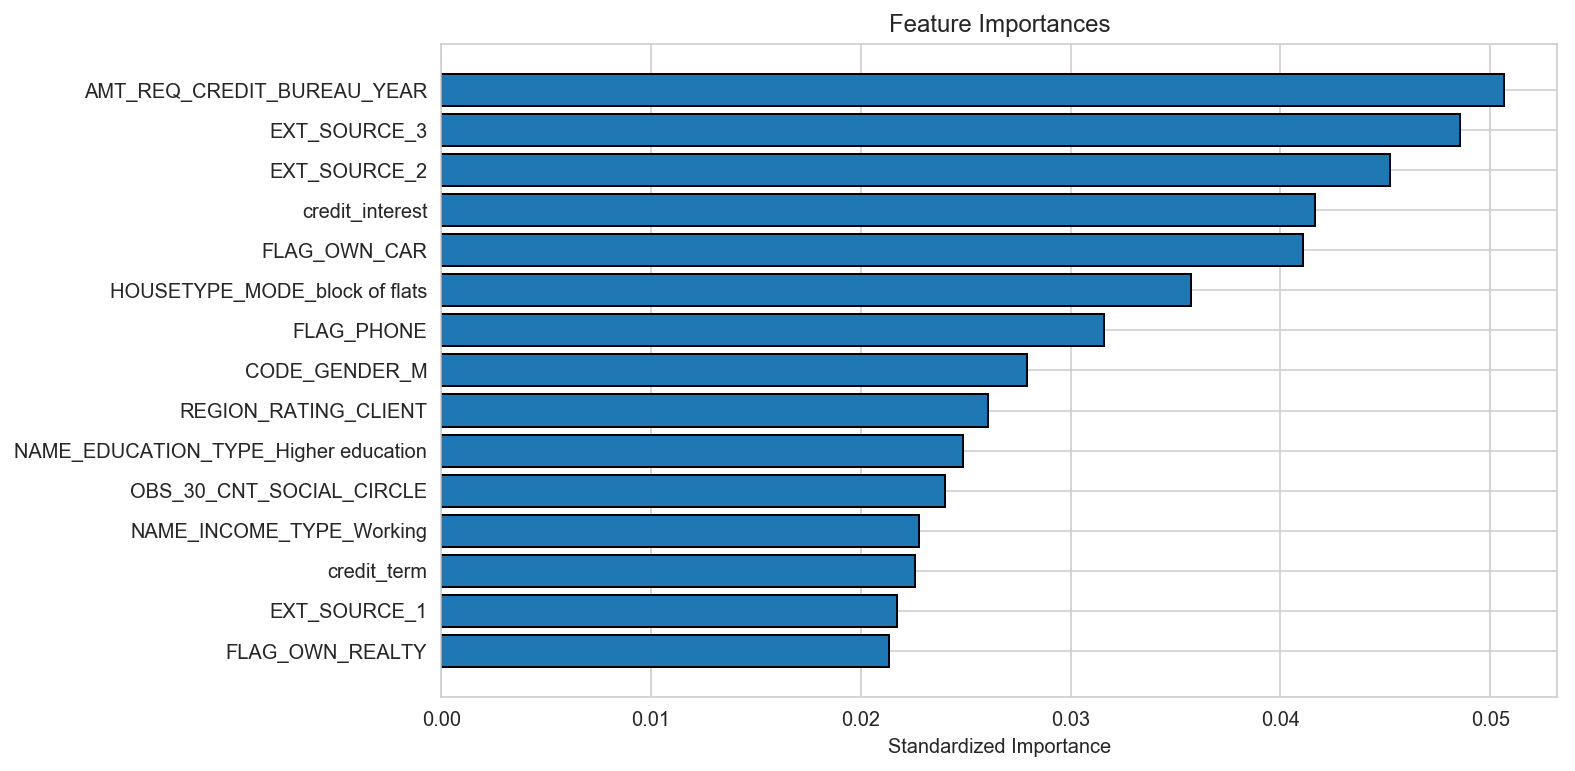

In [151]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

## 3. XGBoost

In [152]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train_smote,y_train_smote)
class_scorer(xgb_class, Xs_test, y_test)

[[56151   403]
 [ 4784   165]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.29      0.03      0.06      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.61      0.51      0.51     61503
weighted avg       0.87      0.92      0.88     61503


ROC AUC Score:  0.7139193505052595


In [156]:
# Extract feature importances
xgb_feature_importance_values = xgb_class.feature_importances_
xgb_feature_importances_domain = pd.DataFrame({'feature': features, 'importance': xgb_feature_importance_values})

# Make predictions on the test data
xgb_predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [154]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = xgb_predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.09  
1  100005      0.35  
2  100013      0.09  
3  100028      0.12  
4  100038      0.26

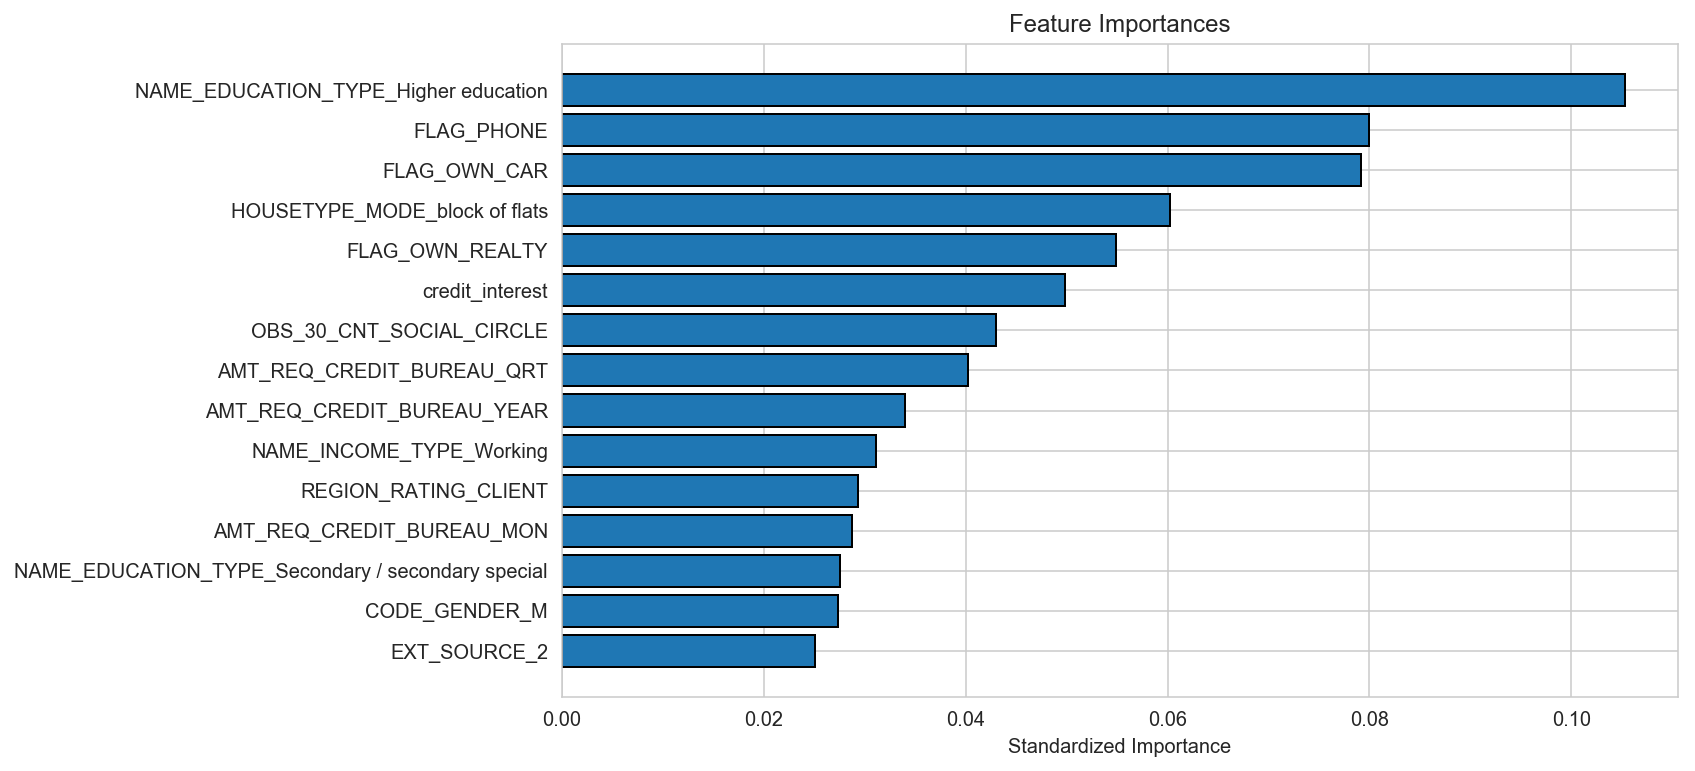

In [157]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(xgb_feature_importances_domain)

## 4. CatBoost

In [125]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(X_train_smote,y_train_smote)
class_scorer(cat_class, Xs_test, y_test)

Learning rate set to 0.094537
0:	learn: 0.6319466	total: 465ms	remaining: 7m 44s
1:	learn: 0.5970892	total: 781ms	remaining: 6m 29s
2:	learn: 0.5311619	total: 1.29s	remaining: 7m 10s
3:	learn: 0.4746217	total: 1.75s	remaining: 7m 16s
4:	learn: 0.4320362	total: 2.08s	remaining: 6m 54s
5:	learn: 0.4005421	total: 2.48s	remaining: 6m 50s
6:	learn: 0.3693019	total: 2.97s	remaining: 7m 1s
7:	learn: 0.3420548	total: 3.32s	remaining: 6m 51s
8:	learn: 0.3248613	total: 3.69s	remaining: 6m 45s
9:	learn: 0.3166544	total: 3.95s	remaining: 6m 30s
10:	learn: 0.2996512	total: 4.29s	remaining: 6m 26s
11:	learn: 0.2837606	total: 4.66s	remaining: 6m 23s
12:	learn: 0.2695434	total: 5.03s	remaining: 6m 21s
13:	learn: 0.2603431	total: 5.36s	remaining: 6m 17s
14:	learn: 0.2502025	total: 5.71s	remaining: 6m 14s
15:	learn: 0.2455757	total: 6.02s	remaining: 6m 10s
16:	learn: 0.2385486	total: 6.4s	remaining: 6m 10s
17:	learn: 0.2310334	total: 6.77s	remaining: 6m 9s
18:	learn: 0.2276760	total: 7.07s	remaining: 6m

In [126]:
# Make predictions
# Make sure to select the second column only
cat_class_pred_domain = cat_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = cat_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.030607
1  100005      0.183829
2  100013      0.007344
3  100028      0.034306
4  100038      0.107392

In [127]:
# Save the submission to a csv file
submit.to_csv('cat_class_manual_two.csv', index = False)

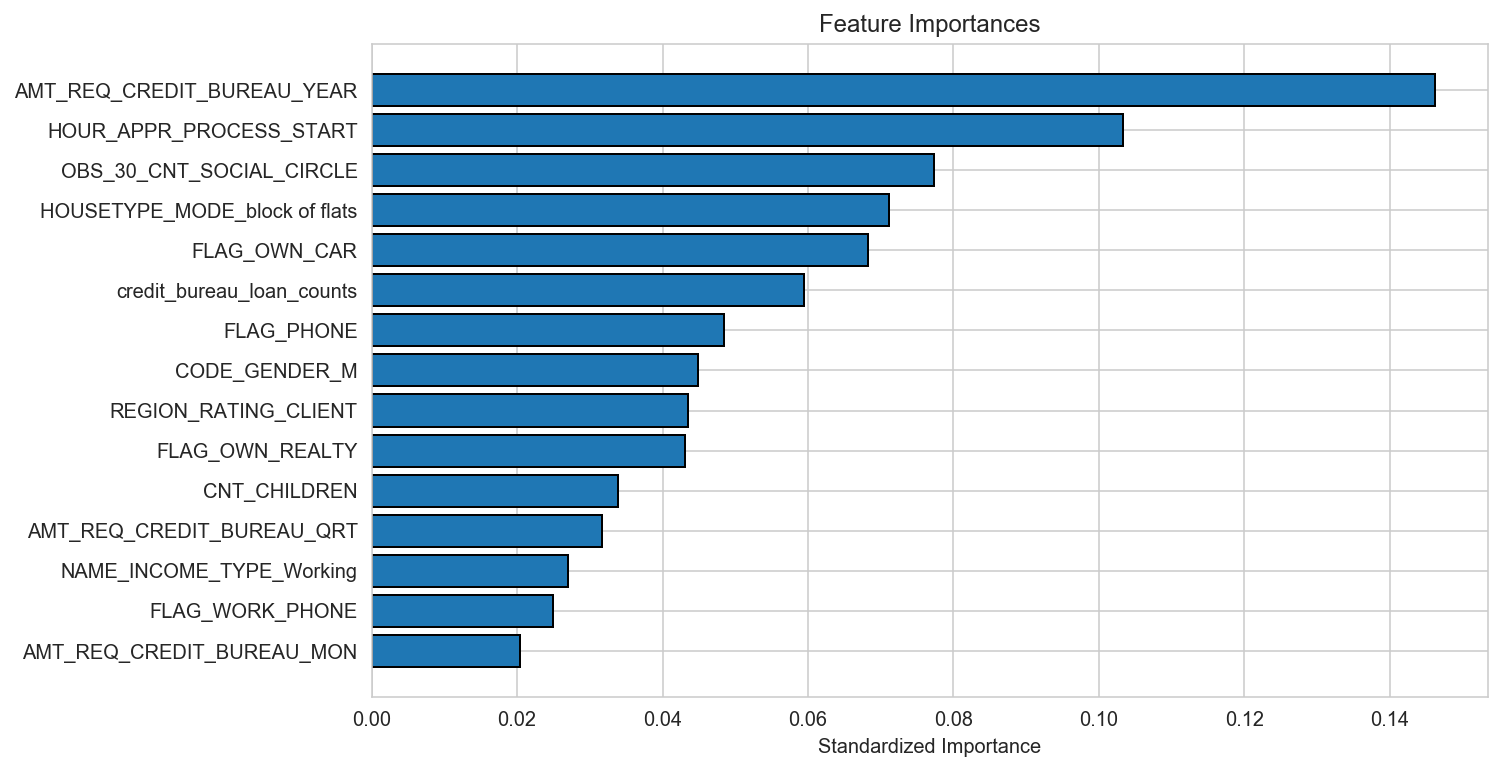

In [128]:
# Extract feature importances
feature_importance_values = cat_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [709]:
def cat_w_grid(X,y):
    cat_class = CatBoostClassifier()

    cat_params = {
                  'depth':[2, 3, 4],
                  'loss_function': ['Logloss', 'CrossEntropy'],
                  'l2_leaf_reg':np.logspace(-20, -19, 3)
                  }

    grid_cat = GridSearchCV(cat_class,param_grid=cat_params,cv=10,n_jobs=-1,verbose=1)
    grid_cat.fit(X,y)
    
    print('best score: ', grid_cat.best_score_)
    print('best parameters: ', grid_cat.best_params_)
    
    return grid_cat.best_estimator_

In [140]:
# optimal_cat = cat_w_grid(X_train_smote,y_train_smote)
# class_scorer(optimal_cat,Xs_test, y_test)

In [284]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

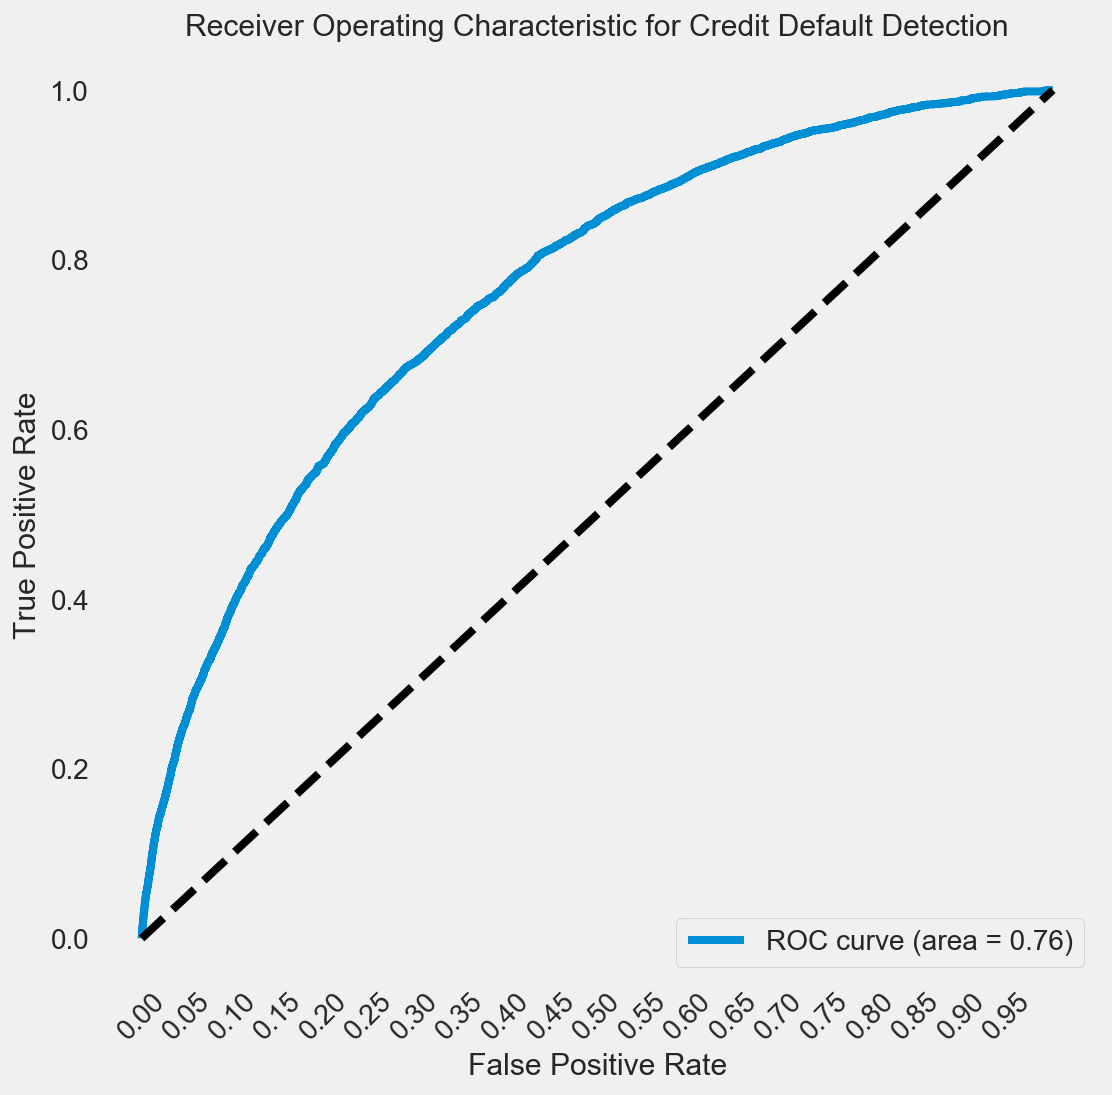

In [716]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

predprob_q1 = optimal_cat.predict_proba(Xs_test)

fpr, tpr, thresholds = roc_curve(y_test, predprob_q1[:,1])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc, linewidth =4)
plt.plot([0,1],[0,1], 'k--', linewidth=4)

plt.xlim([-0.05,1.0])
plt.xlim([-0.05,1.05])
plt.xticks(np.arange(0,1,0.05),rotation = 45)
plt.grid()

plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic for Credit Default Detection', fontsize=15)
plt.legend(loc='lower right')

In [285]:
precision, recall, thresholds = precision_recall_curve(y_test, predprob_q1[:,1])
auc_score = auc(recall, precision)


NameError: name 'predprob_q1' is not defined

In [ ]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [210]:
print(X_train_smote.shape)
print(Xs_test.shape)
print(test.shape)

(452264, 185)
(61503, 185)
(48744, 185)


# Voting Classifier - Weighted Average

In [158]:
from sklearn.ensemble import VotingClassifier

# clf1 = LogisticRegression(C = 0.0001)
# clf2 = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
# clf3 = XGBClassifier()
# clf4 = CatBoostClassifier()

#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])

In [163]:
eclf2 = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('xgb', xgb_class), ('cat', cat_class)], voting='soft')
eclf2 = eclf2.fit(X_train_smote, y_train_smote)
print(eclf2.predict(X_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


Learning rate set to 0.094537
0:	learn: 0.6319466	total: 273ms	remaining: 4m 32s
1:	learn: 0.5970892	total: 548ms	remaining: 4m 33s
2:	learn: 0.5311619	total: 903ms	remaining: 5m
3:	learn: 0.4746217	total: 1.24s	remaining: 5m 7s
4:	learn: 0.4320362	total: 1.55s	remaining: 5m 9s
5:	learn: 0.4005421	total: 1.87s	remaining: 5m 9s
6:	learn: 0.3693019	total: 2.23s	remaining: 5m 17s
7:	learn: 0.3420548	total: 2.53s	remaining: 5m 13s
8:	learn: 0.3248613	total: 2.82s	remaining: 5m 10s
9:	learn: 0.3166544	total: 3.09s	remaining: 5m 5s
10:	learn: 0.2996512	total: 3.36s	remaining: 5m 2s
11:	learn: 0.2837606	total: 3.66s	remaining: 5m 1s
12:	learn: 0.2695434	total: 4.01s	remaining: 5m 4s
13:	learn: 0.2603431	total: 4.28s	remaining: 5m 1s
14:	learn: 0.2502025	total: 4.6s	remaining: 5m 2s
15:	learn: 0.2455757	total: 4.87s	remaining: 4m 59s
16:	learn: 0.2385486	total: 5.19s	remaining: 5m
17:	learn: 0.2310334	total: 5.53s	remaining: 5m 1s
18:	learn: 0.2276760	total: 5.79s	remaining: 4m 59s
19:	learn: 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


[1 1 1 ... 1 1 1]


In [214]:
eclf2_predictions = eclf2.predict(Xs_test)
eclf2_pred_proba = eclf2.predict_proba(Xs_test)
print(confusion_matrix(y_test,eclf2_predictions))
print(classification_report(y_test,eclf2_predictions))
print()
print('ROC AUC Score: ',roc_auc_score(y_test,eclf2_pred_proba[:,1]))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


[[55854   700]
 [ 4479   470]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56554
           1       0.40      0.09      0.15      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.66      0.54      0.55     61503
weighted avg       0.88      0.92      0.89     61503


ROC AUC Score:  0.7513466870156367


In [215]:
# Make predictions
# Make sure to select the second column only
eclf2_pred = eclf2.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = eclf2_pred

submit.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


SK_ID_CURR    TARGET
0  100001      0.150009
1  100005      0.443655
2  100013      0.102784
3  100028      0.156488
4  100038      0.323637

In [216]:
# Save the submission to a csv file
submit.to_csv('eclf2.csv', index = False)

In [218]:
eclf3 = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('xgb', xgb_class), ('cat', cat_class)], voting='soft', weights=[1,1,1,2], flatten_transform=True)
eclf3 = eclf3.fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


Learning rate set to 0.094537
0:	learn: 0.6319466	total: 390ms	remaining: 6m 29s
1:	learn: 0.5970892	total: 717ms	remaining: 5m 58s
2:	learn: 0.5311619	total: 1.08s	remaining: 5m 59s
3:	learn: 0.4746217	total: 1.46s	remaining: 6m 4s
4:	learn: 0.4320362	total: 1.75s	remaining: 5m 49s
5:	learn: 0.4005421	total: 2.1s	remaining: 5m 47s
6:	learn: 0.3693019	total: 2.47s	remaining: 5m 50s
7:	learn: 0.3420548	total: 2.8s	remaining: 5m 47s
8:	learn: 0.3248613	total: 3.14s	remaining: 5m 46s
9:	learn: 0.3166544	total: 3.43s	remaining: 5m 39s
10:	learn: 0.2996512	total: 3.74s	remaining: 5m 36s
11:	learn: 0.2837606	total: 4.06s	remaining: 5m 34s
12:	learn: 0.2695434	total: 4.43s	remaining: 5m 36s
13:	learn: 0.2603431	total: 4.73s	remaining: 5m 33s
14:	learn: 0.2502025	total: 5.07s	remaining: 5m 32s
15:	learn: 0.2455757	total: 5.36s	remaining: 5m 29s
16:	learn: 0.2385486	total: 5.73s	remaining: 5m 31s
17:	learn: 0.2310334	total: 6.11s	remaining: 5m 33s
18:	learn: 0.2276760	total: 6.38s	remaining: 5m

In [219]:
eclf3_predictions = eclf3.predict(Xs_test)
eclf3_pred_proba = eclf3.predict_proba(Xs_test)
print(confusion_matrix(y_test,eclf3_predictions))
print(classification_report(y_test,eclf3_predictions))
print()
print('ROC AUC Score: ',roc_auc_score(y_test,eclf3_pred_proba[:,1]))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


[[56152   402]
 [ 4607   342]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.46      0.07      0.12      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.69      0.53      0.54     61503
weighted avg       0.89      0.92      0.89     61503


ROC AUC Score:  0.7554782478990552


In [262]:
# Make predictions
# Make sure to select the second column only
eclf3_pred = eclf3.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = eclf3_pred

submit.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


SK_ID_CURR    TARGET
0  100001      0.126129
1  100005      0.391690
2  100013      0.083696
3  100028      0.132052
4  100038      0.280388

In [221]:
# Save the submission to a csv file
submit.to_csv('eclf3.csv', index = False)

In [1]:
# # Grid Search Voting Classifier

eclf3_params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf3, param_grid=eclf3_params, cv=5)
grid = grid.fit(X_train_smote, y_train_smote)

In [263]:
grid_eclf3_predictions = grid.predict(Xs_test)
grid_eclf3_pred_proba = grid.predict_proba(Xs_test)
print(confusion_matrix(y_test,grid_eclf3_predictions))
print(classification_report(y_test,grid_eclf3_predictions))
print()
print('ROC AUC Score: ',roc_auc_score(y_test,grid_eclf3_pred_proba[:,1]))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.1s finished


[[56129   425]
 [ 4594   355]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.46      0.07      0.12      4949

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.69      0.53      0.54     61503
weighted avg       0.89      0.92      0.89     61503


ROC AUC Score:  0.7556216135422631


In [264]:
# Make predictions
# Make sure to select the second column only
eclf3_grid_pred = grid.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = eclf3_grid_pred 

submit.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


SK_ID_CURR    TARGET
0  100001      0.129659
1  100005      0.383724
2  100013      0.067410
3  100028      0.126213
4  100038      0.272539

In [265]:
# Save the submission to a csv file
submit.to_csv('voting_classifier_gridsearch.csv', index = False)

# TRY RFEC Again 

In [174]:
# downsample because it took too long to run. estimated at least 30hours.
# 10,000 rows 70 features took 30mins
# 300,000 rows 250 features = ????????

In [222]:
app_train_domain.shape

(307511, 253)

In [223]:
# Separate majority and minority classes
df_majority = app_train_domain[app_train_domain.TARGET==0]
df_minority = app_train_domain[app_train_domain.TARGET==1]

In [224]:
df_majority.shape

(282686, 253)

In [225]:
df_minority.shape

(24825, 253)

In [229]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

1    24825
0    24825
Name: TARGET, dtype: int64

In [230]:
df_downsampled.shape

(49650, 253)

In [239]:
if 'TARGET' in app_train:
    d_train = df_downsampled.drop(columns = ['TARGET'])
else:
    d_train = df_downsampled.copy()
    
# Feature names
d_features = list(d_train.columns)

# Copy of the testing data
d_test = app_test_domain.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(d_train)

# Transform both training and testing data
d_train = imputer.transform(d_train)
d_test = imputer.transform(d_test)

# train-test-split our training set.
d_X = d_train
d_y = df_downsampled.TARGET

dX_train, dX_test, dy_train, dy_test = train_test_split(d_X, d_y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(dX_train)
dXs_train = scaler.transform(dX_train)
dXs_test = scaler.transform(dX_test)
d_test = scaler.transform(d_test)

# # Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
# from imblearn.over_sampling import SMOTE
# smt = SMOTE(random_state=42)

# dX_train_smote, dy_train_smote = smt.fit_sample(dXs_train, dy_train)

In [240]:
print('Training data shape: ', dXs_train.shape)
print('Testing data shape: ', dXs_test.shape)
print('Actual Test data shape: ', d_test.shape)

Training data shape:  (39720, 252)
Testing data shape:  (9930, 252)
Actual Test data shape:  (48744, 252)


In [231]:
X_downsampled = df_downsampled.drop(columns = ['TARGET'])
X_downsampled.shape

(49650, 252)

In [242]:
cols = list(X_downsampled.columns)

from sklearn.feature_selection import RFECV
log_reg = LogisticRegression(C = 0.0001, n_jobs = -1)


lr_selector = RFECV(log_reg, step=1, cv=5, n_jobs = -1)
lr_selector = lr_selector.fit(dXs_train, dy_train)

lr_rfecv_predictors = np.array(cols)[lr_selector.support_]

print(lr_rfecv_predictors)
print(lr_selector.support_)
print(lr_selector.ranking_)

['NAME_CONTRACT_TYPE' 'FLAG_OWN_CAR' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_WORK_PHONE'
 'REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY'
 'REG_CITY_NOT_LIVE_CITY' 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3'
 'ELEVATORS_AVG' 'DEF_30_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE'
 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_13'
 'AMT_REQ_CREDIT_BUREAU_YEAR' 'bureau_AMT_CREDIT_MAX_OVERDUE_max'
 'CODE_GENDER_F' 'CODE_GENDER_M' 'NAME_INCOME_TYPE_Pensioner'
 'NAME_INCOME_TYPE_Working' 'NAME_EDUCATION_TYPE_Higher education'
 'NAME_EDUCATION_TYPE_Lower secondary'
 'NAME_EDUCATION_TYPE_Secondary / secondary special'
 'NAME_FAMILY_STATUS_Married' 'OCCUPATION_TYPE_Core staff'
 'OCCUPATION_TYPE_Drivers' 'OCCUPATION_TYPE_Laborers'
 'OCCUPATION_TYPE_Low-skill Laborers' 'ORGANIZATION_TYPE_Self-employed'
 'ORGANIZATION_TYPE_XNA' 'HOUSETYPE_MODE_block of flats'
 'annuity_income_percent' 'days_employed_percent' 'credit_interest']
[False

In [267]:
len(lr_rfecv_predictors)

40

In [243]:
cols = list(X_downsampled.columns)

from sklearn.feature_selection import RFECV
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

rf_selector = RFECV(random_forest, step=1, cv=5, n_jobs = -1)
rf_selector = rf_selector.fit(dXs_train, dy_train)

rf_rfecv_predictors = np.array(cols)[rf_selector.support_]

print(rf_rfecv_predictors)
print(rf_selector.support_)
print(rf_selector.ranking_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[

['SK_ID_CURR' 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL'
 'AMT_CREDIT' 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE'
 'DAYS_BIRTH' 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH'
 'OWN_CAR_AGE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3'
 'APARTMENTS_AVG' 'BASEMENTAREA_AVG' 'YEARS_BEGINEXPLUATATION_AVG'
 'YEARS_BUILD_AVG' 'COMMONAREA_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG'
 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE' 'BASEMENTAREA_MODE'
 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE' 'COMMONAREA_MODE'
 'ENTRANCES_MODE' 'LANDAREA_MODE' 'LIVINGAPARTMENTS_MODE'
 'LIVINGAREA_MODE' 'NONLIVINGAREA_MODE' 'APARTMENTS_MEDI'
 'BASEMENTAREA_MEDI' 'YEARS_BEGINEXPLUATATION_MEDI' 'YEARS_BUILD_MEDI'
 'COMMONAREA_MEDI' 'ENTRANCES_MEDI' 'LANDAREA_MEDI'
 'LIVINGAPARTMENTS_MEDI' 'LIVINGAREA_MEDI' 'NONLI

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished


In [268]:
len(rf_rfecv_predictors)

75

In [266]:
# cols = list(X_domain.columns)

# from sklearn.feature_selection import RFECV
# xgb_class = XGBClassifier()

# xgb_selector = RFECV(xgb_class, step=1, cv=5, n_jobs = -1)
# xgb_selector = xgb_selector.fit(dXs_train, dy_train)

# xgb_rfecv_predictors = np.array(cols)[xgb_selector.support_]

# print(xgb_rfecv_predictors)
# print(xgb_selector.support_)
# print(xgb_selector.ranking_)

In [ ]:
# cols = list(X_domain.columns)

# from sklearn.feature_selection import RFECV
# cat_class = CatBoostClassifier()

# cat_selector = RFECV(cat_class, step=1, cv=5, n_jobs = -1)
# cat_selector = cat_selector.fit(dXs_train, dy_train)

# cat_rfecv_predictors = np.array(cols)[cat_selector.support_]

# print(cat_rfecv_predictors)
# print(cat_selector.support_)
# print(cat_selector.ranking_)

In [ ]:
len(lr_rfecv_predictors)

In [ ]:
len(rf_rfecv_predictors)

In [288]:
print(app_train_domain.shape)
print(app_test_domain.shape)

(307511, 253)
(48744, 252)


In [296]:
lr_rfecv_app_train_domain = app_train_domain[lr_rfecv_predictors.tolist()]
lr_rfecv_app_train_domain['TARGET']= app_train_domain.TARGET
lr_rfecv_app_test_domain = app_test_domain[lr_rfecv_predictors.tolist()]

In [297]:
print(lr_rfecv_app_train_domain.shape)
print(lr_rfecv_app_test_domain.shape)

(307511, 41)
(48744, 40)


In [316]:
rf_rfecv_app_train_domain = app_train_domain[rf_rfecv_predictors.tolist()]
rf_rfecv_app_train_domain['TARGET']= app_train_domain.TARGET
rf_rfecv_app_test_domain = app_test_domain[rf_rfecv_predictors.tolist()]
print(rf_rfecv_app_train_domain.shape)
print(rf_rfecv_app_test_domain.shape)

(307511, 76)
(48744, 75)


# LR_RFECV Modelling

In [298]:
# Drop the target from the training data
if 'TARGET' in app_train_domain:
    train = lr_rfecv_app_train_domain.drop(columns = ['TARGET'])
else:
    train = lr_rfecv_app_train_domain.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = lr_rfecv_app_test_domain.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 40)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 40)


## 1. Logistic Regression

In [299]:
# Make the model with the specified regularization parameter

log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38089 18465]
 [ 1545  3404]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56554
           1       0.16      0.69      0.25      4949

   micro avg       0.67      0.67      0.67     61503
   macro avg       0.56      0.68      0.52     61503
weighted avg       0.90      0.67      0.75     61503


ROC AUC Score:  0.7453438518444594


In [300]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0  100001      0.429724
1  100005      0.771315
2  100013      0.231079
3  100028      0.306204
4  100038      0.577899

In [302]:
# Save the submission to a csv file
submit.to_csv('lr_rfecv_logreg.csv', index = False)

# 2. Random Forest

In [303]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


[[54687  1867]
 [ 4354   595]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56554
           1       0.24      0.12      0.16      4949

   micro avg       0.90      0.90      0.90     61503
   macro avg       0.58      0.54      0.55     61503
weighted avg       0.87      0.90      0.88     61503


ROC AUC Score:  0.7116511535389158


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [304]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_polynomial = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [305]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.09  
1  100005      0.27  
2  100013      0.05  
3  100028      0.28  
4  100038      0.44

In [307]:
# Save the submission to a csv file
submit.to_csv('lr_rfecv_random_forest.csv', index = False)

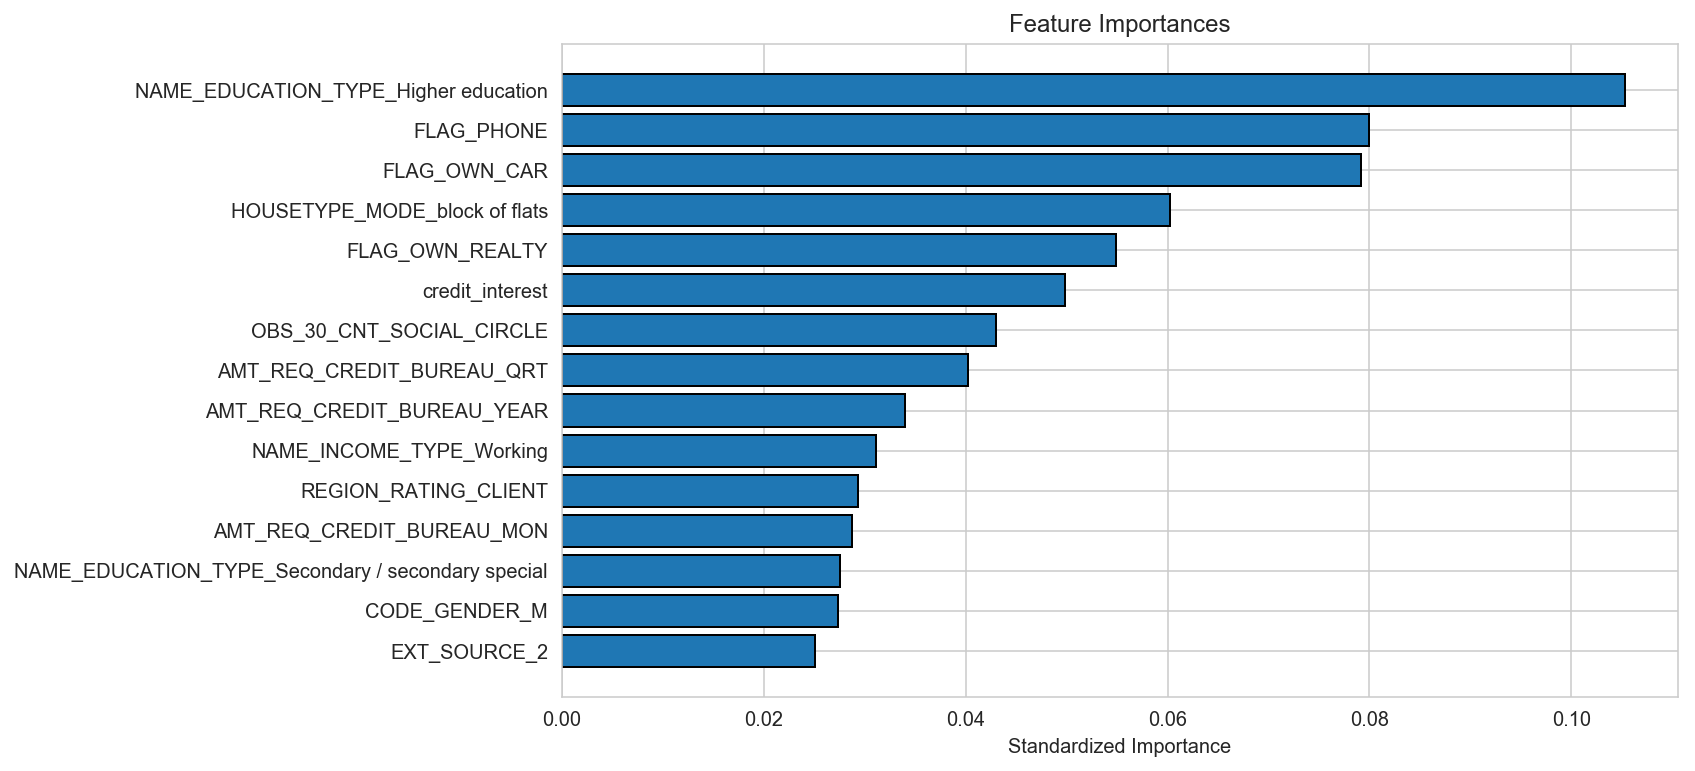

In [308]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

# 3.XGBoost

In [309]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train_smote,y_train_smote)
class_scorer(xgb_class, Xs_test, y_test)

[[52146  4408]
 [ 3669  1280]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     56554
           1       0.23      0.26      0.24      4949

   micro avg       0.87      0.87      0.87     61503
   macro avg       0.58      0.59      0.58     61503
weighted avg       0.88      0.87      0.87     61503


ROC AUC Score:  0.7146426438593982


In [310]:
# Make predictions
# Make sure to select the second column only
xgb_class_pred_domain = xgb_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = xgb_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.118378
1  100005      0.389614
2  100013      0.133185
3  100028      0.241279
4  100038      0.421056

In [311]:
# Save the submission to a csv file
submit.to_csv('lr_rfecv_xgb.csv', index = False)

# 4. CatBoost

In [312]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(X_train_smote,y_train_smote)
class_scorer(cat_class, Xs_test, y_test)

Learning rate set to 0.094537
0:	learn: 0.6379586	total: 308ms	remaining: 5m 8s
1:	learn: 0.6049263	total: 493ms	remaining: 4m 6s
2:	learn: 0.5854284	total: 754ms	remaining: 4m 10s
3:	learn: 0.5294883	total: 1.07s	remaining: 4m 27s
4:	learn: 0.5067180	total: 1.4s	remaining: 4m 39s
5:	learn: 0.4980788	total: 1.68s	remaining: 4m 37s
6:	learn: 0.4904718	total: 1.97s	remaining: 4m 39s
7:	learn: 0.4752616	total: 2.3s	remaining: 4m 45s
8:	learn: 0.4520751	total: 2.61s	remaining: 4m 47s
9:	learn: 0.4464434	total: 2.89s	remaining: 4m 46s
10:	learn: 0.4356808	total: 3.21s	remaining: 4m 48s
11:	learn: 0.4309679	total: 3.54s	remaining: 4m 51s
12:	learn: 0.4209441	total: 3.87s	remaining: 4m 53s
13:	learn: 0.4139020	total: 4.14s	remaining: 4m 51s
14:	learn: 0.4097435	total: 4.49s	remaining: 4m 55s
15:	learn: 0.4031390	total: 4.77s	remaining: 4m 53s
16:	learn: 0.3885157	total: 5.09s	remaining: 4m 54s
17:	learn: 0.3756437	total: 5.4s	remaining: 4m 54s
18:	learn: 0.3655289	total: 5.7s	remaining: 4m 54

In [313]:
# Make predictions
# Make sure to select the second column only
cat_class_pred_domain = cat_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = cat_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.068541
1  100005      0.316061
2  100013      0.023007
3  100028      0.133913
4  100038      0.258652

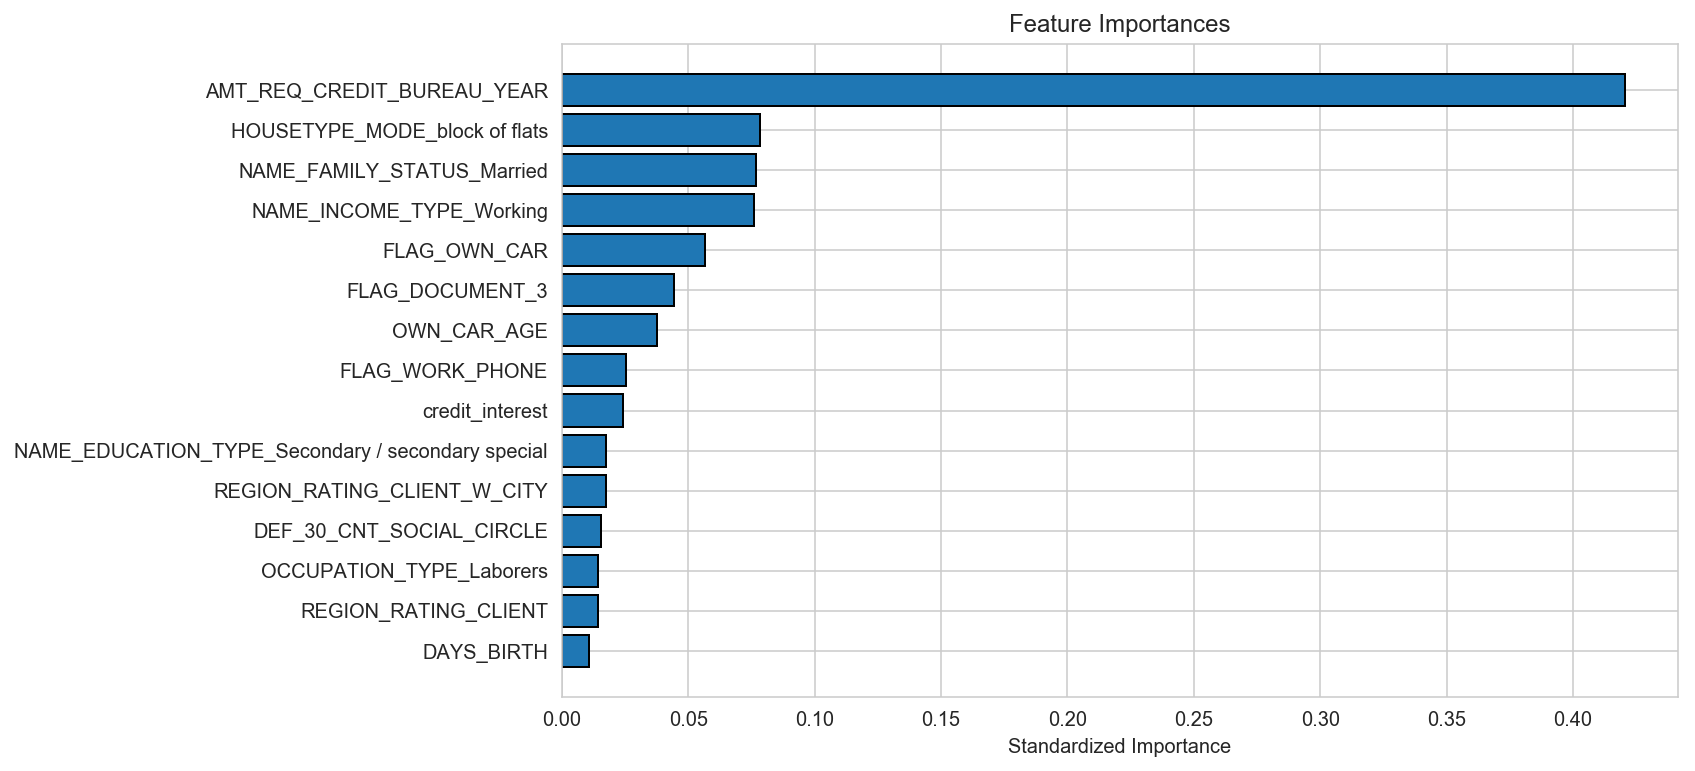

In [314]:
# Save the submission to a csv file
submit.to_csv('lr_rfecv_cat_boost.csv', index = False)

# Extract feature importances
feature_importance_values = cat_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

# Random Forest RFECV Modelling

In [317]:
# Drop the target from the training data
if 'TARGET' in app_train_domain:
    train = rf_rfecv_app_train_domain.drop(columns = ['TARGET'])
else:
    train = rf_rfecv_app_train_domain.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = rf_rfecv_app_test_domain.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = StandardScaler()

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# train-test-split our training set.
X = train
y = app_train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale each feature to 0-1
scaler = StandardScaler()

# Repeat with the scaler
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)
test = scaler.transform(test)

# Oversample people who defaulted on our training set using SMOTE because it is an imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

X_train_smote, y_train_smote = smt.fit_sample(Xs_train, y_train)

print('Training data shape: ', X_train_smote.shape)
print('Testing data shape: ', y_train_smote.shape)
print('Actual Test data shape: ', test.shape)

Training data shape:  (452264, 75)
Testing data shape:  (452264,)
Actual Test data shape:  (48744, 75)


# 1. Logistic Regression

In [318]:
# Make the model with the specified regularization parameter

log_reg.fit(X_train_smote,y_train_smote)
class_scorer(log_reg, Xs_test, y_test)

[[38083 18471]
 [ 1604  3345]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56554
           1       0.15      0.68      0.25      4949

   micro avg       0.67      0.67      0.67     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.67      0.75     61503


ROC AUC Score:  0.7417195086455027


In [319]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0  100001      0.429433
1  100005      0.742753
2  100013      0.211620
3  100028      0.262222
4  100038      0.631313

In [321]:
# Save the submission to a csv file
submit.to_csv('rf_rfecv_logreg.csv', index = False)

# 2. Random Forest

In [322]:
# Train on the training data
random_forest.fit(X_train_smote,y_train_smote)
class_scorer(random_forest, Xs_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


[[55611   943]
 [ 4579   370]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56554
           1       0.28      0.07      0.12      4949

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.60      0.53      0.54     61503
weighted avg       0.87      0.91      0.89     61503


ROC AUC Score:  0.708337751505216


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [323]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances_polynomial = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [324]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.head()

SK_ID_CURR  TARGET
0  100001      0.08  
1  100005      0.30  
2  100013      0.05  
3  100028      0.17  
4  100038      0.29

In [325]:
# Save the submission to a csv file
submit.to_csv('rf_rfecv_random_forest.csv', index = False)

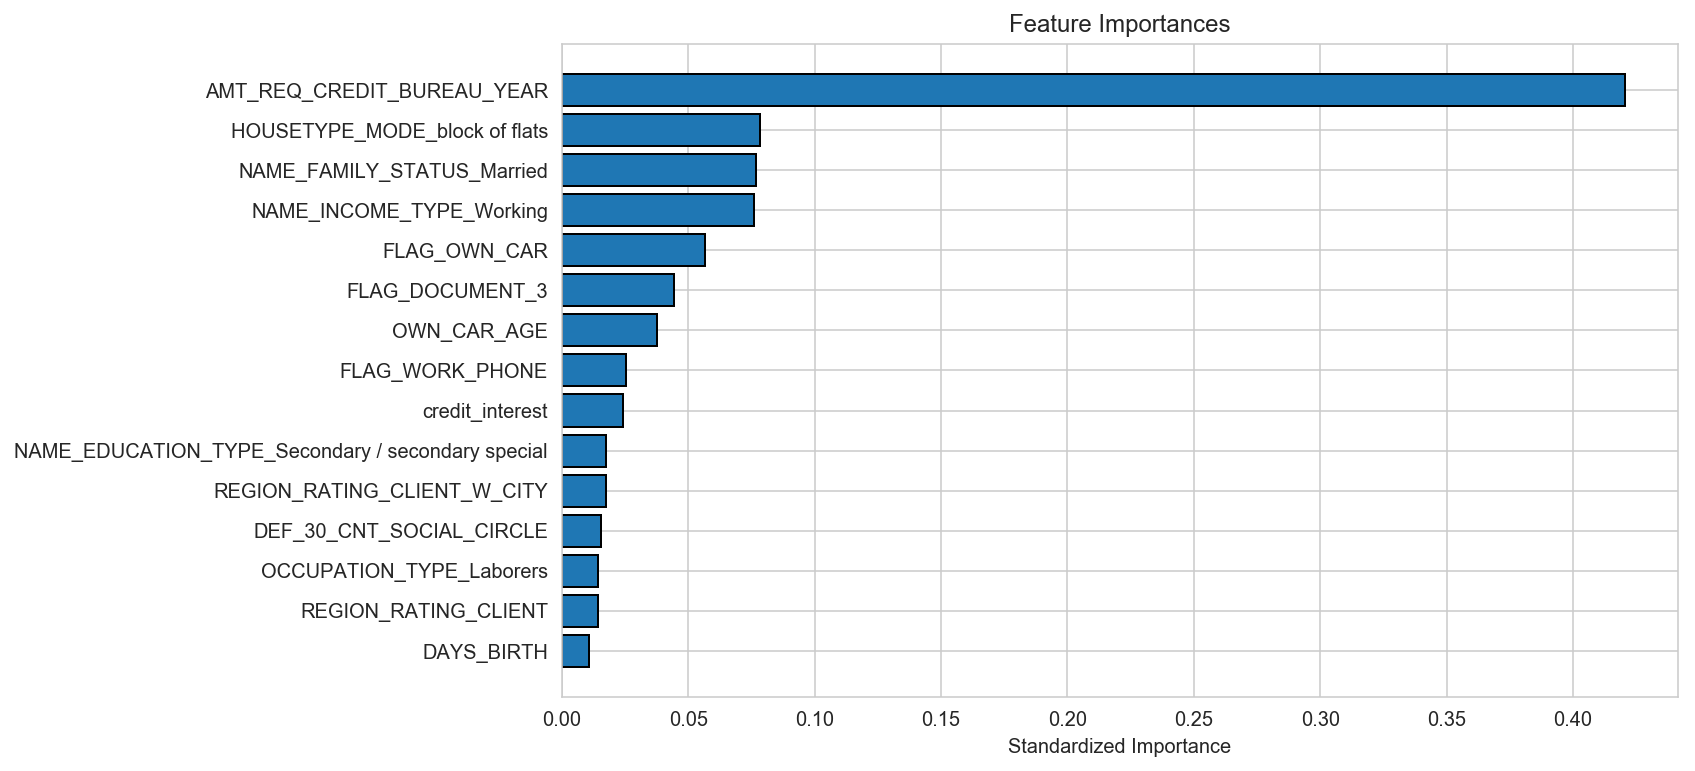

In [326]:
# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

# 3. XGBoost

In [327]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train_smote,y_train_smote)
class_scorer(xgb_class, Xs_test, y_test)

[[54471  2083]
 [ 4286   663]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     56554
           1       0.24      0.13      0.17      4949

   micro avg       0.90      0.90      0.90     61503
   macro avg       0.58      0.55      0.56     61503
weighted avg       0.87      0.90      0.88     61503


ROC AUC Score:  0.7106404786330205


In [328]:
# Make predictions
# Make sure to select the second column only
xgb_class_pred_domain = xgb_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = xgb_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.134676
1  100005      0.429564
2  100013      0.062196
3  100028      0.218920
4  100038      0.469876

In [329]:
# Save the submission to a csv file
submit.to_csv('rf_rfecv_xgb.csv', index = False)

# 4. CatBoost

In [330]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(X_train_smote,y_train_smote)
class_scorer(cat_class, Xs_test, y_test)

Learning rate set to 0.094537
0:	learn: 0.6381930	total: 365ms	remaining: 6m 4s
1:	learn: 0.5935752	total: 678ms	remaining: 5m 38s
2:	learn: 0.5618943	total: 1.01s	remaining: 5m 36s
3:	learn: 0.5481901	total: 1.28s	remaining: 5m 18s
4:	learn: 0.5240252	total: 1.61s	remaining: 5m 20s
5:	learn: 0.5034069	total: 1.96s	remaining: 5m 24s
6:	learn: 0.4886665	total: 2.24s	remaining: 5m 17s
7:	learn: 0.4710386	total: 2.59s	remaining: 5m 20s
8:	learn: 0.4548868	total: 2.87s	remaining: 5m 16s
9:	learn: 0.4300052	total: 3.22s	remaining: 5m 18s
10:	learn: 0.4188916	total: 3.52s	remaining: 5m 16s
11:	learn: 0.4109585	total: 3.84s	remaining: 5m 15s
12:	learn: 0.4006975	total: 4.17s	remaining: 5m 16s
13:	learn: 0.3701472	total: 4.48s	remaining: 5m 15s
14:	learn: 0.3511421	total: 4.81s	remaining: 5m 16s
15:	learn: 0.3437569	total: 5.12s	remaining: 5m 15s
16:	learn: 0.3380195	total: 5.39s	remaining: 5m 11s
17:	learn: 0.3345793	total: 5.7s	remaining: 5m 10s
18:	learn: 0.3298393	total: 5.97s	remaining: 5

In [331]:
# Make predictions
# Make sure to select the second column only
cat_class_pred_domain = cat_class.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test_domain[['SK_ID_CURR']]
submit['TARGET'] = cat_class_pred_domain

submit.head()

SK_ID_CURR    TARGET
0  100001      0.036097
1  100005      0.149422
2  100013      0.008234
3  100028      0.032979
4  100038      0.195330

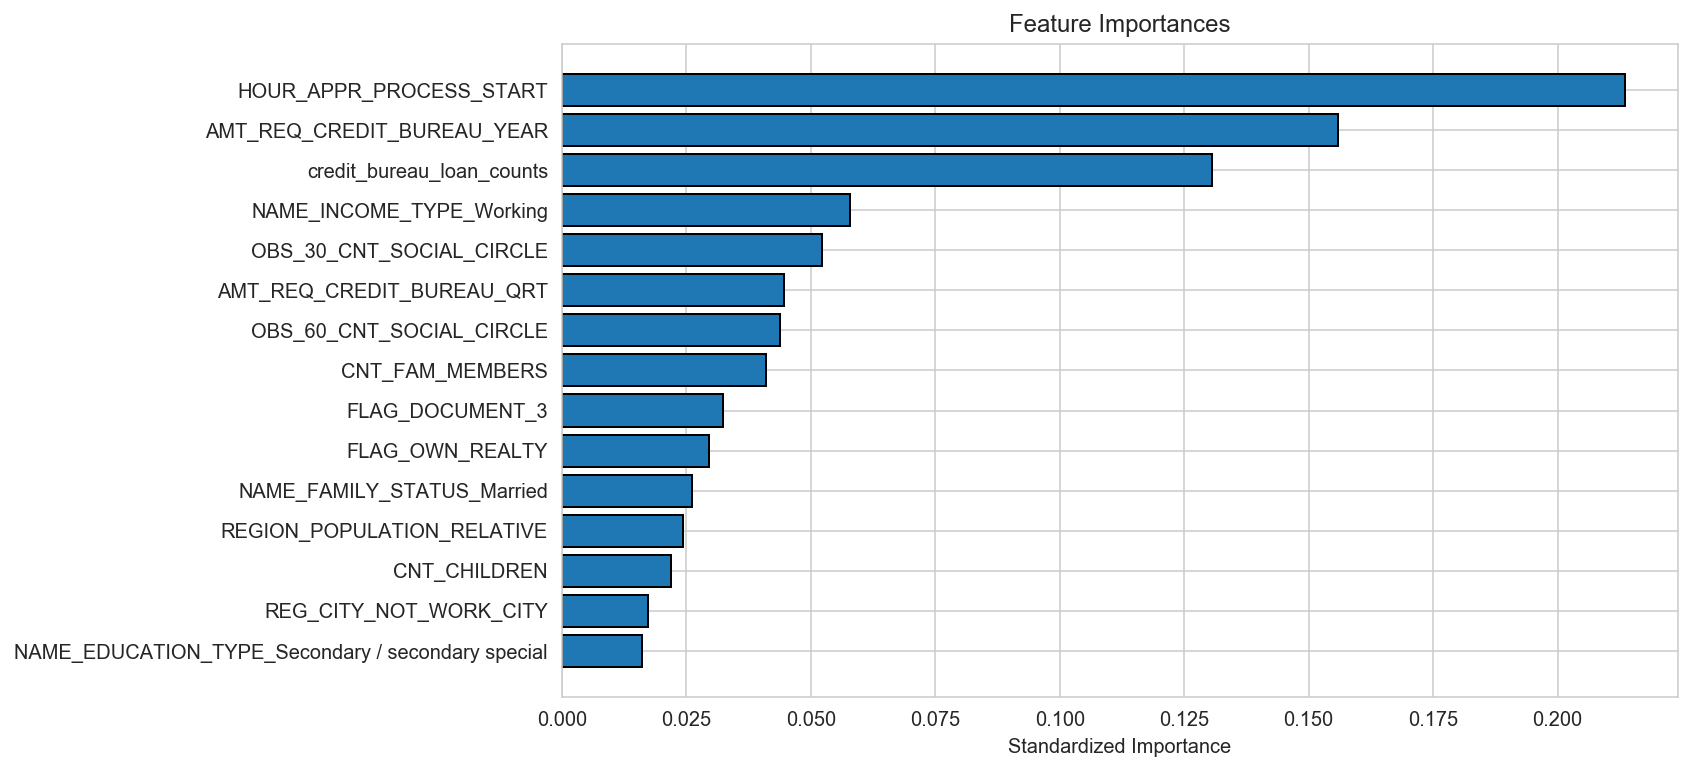

In [332]:
# Save the submission to a csv file
submit.to_csv('rf_rfecv_cat_boost.csv', index = False)

# Extract feature importances
feature_importance_values = cat_class.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Show the feature importances for the domain features
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

# Conclusion

## In the end, SelectKBest and RFECV did not work as well as manual eliminations.
### - Our final model, catboost was derived by adding in domain features such as credit_term, previous_loan_counts and other_loan_counts.
### - Model selection was based on ROC-AUC score, followed by precision score because our project goal is to reduce number of loan rejections (false positives otherwise known as type 1 error)
## Features:
#### - Number of credit bureau enquiry about client
#### - Time of application of the loan
#### - Number of loans with other creditors
#### - Whether they own a property
#### - Whether they own a car
#### - Whether client provided their phone number when applying for loan
#### - Whehther client is male
#### - Client's social Circle, whether any of his or her friend defaulted or made late payments in the past 30 days

### Next step to take, is to utilise the remaining datasets (Previous_Application, Credit_card_balance and Installment_payments)